In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install openpyxl==3.0.0

In [125]:
!pip install fasttext

In [4]:
!pip install nlpaug
!pip install openpyxl
!pip install -q xlrd
!pip install -q xlrd
!pip install -U -q PyDrive


In [6]:
!pip install wordcloud

In [7]:
import time
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import random
import sklearn
from sklearn.utils import class_weight
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import decomposition, ensemble
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, recall_score, f1_score
from sklearn.metrics import make_scorer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

from keras.utils import np_utils

from xgboost import XGBClassifier


import string

from tqdm import tqdm

tqdm().pandas()
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
nltk.download('words')
import collections
import matplotlib.cm as cm
from matplotlib import rcParams
import time
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from collections import defaultdict
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import random
import re
import pandas as pd
from nltk import sent_tokenize
from tqdm import tqdm
#from albumentations.core.transforms_interface import DualTransform, BasicTransform
import openpyxl
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import PCA


0it [00:00, ?it/s]
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ss1\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ss1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ss1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ss1\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [126]:
import fasttext
import fasttext.util

In [8]:
df = pd.read_excel('input.xlsx', index_col=0) 

In [9]:
df.reset_index(inplace = True)

In [10]:
df

Short description  \
0                                           login issue   
1                                               outlook   
2                                    cant log in to vpn   
3                         unable to access hr_tool page   
4                                          skype error    
...                                                 ...   
8495                  emails not coming in from zz mail   
8496                           telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8498                     machine nÃ£o estÃ¡ funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description             Caller  \
0     -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1     _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2     _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                         unable to access hr_tool page  xbkucsvz gcpydteq   
4                                          skype error   owlgqjme qhcozdfx   
...                                                 ...                ...   
8495  _x000D_\n_x000D_\nreceived from: avglmrts.vhqm...  avglmrts vhqmtiua   
8496                           telephony_software issue  rbozivdq gmlhrtvp   
8497  vip2: windows password reset for tifpdchb pedx...  oybwdsgx oxyhwrfz   
8498  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8499  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group  
0               GRP_0  
1               GRP_0  
2               GRP_0  
3               GRP_0  
4               GRP_0  
...               ...  
8495           GRP_29  
8496            GRP_0  
8497            GRP_0  
8498           GRP_62  
8499           GRP_49  

[8500 rows x 4 columns]

In [11]:
df_processing = df.copy()
df_processing['text'] = df['Short description']+" "+df["Description"]
df_processing = df_processing[['text','Assignment group']]

df_processing['Assignment group']= df_processing['Assignment group'].str.replace('GRP','')
df_processing['Assignment group']= df_processing['Assignment group'].str.replace('_','')
df_processing['Assignment group']= df_processing['Assignment group'].astype(int)
df_processing['text']= df_processing['text'].astype(str)
df_processing['Assignment group'].value_counts()

0     3976
8      661
24     289
12     257
9      252
      ... 
61       1
35       1
73       1
64       1
67       1
Name: Assignment group, Length: 74, dtype: int64

<h1> Assignment Group Distribution </h1>

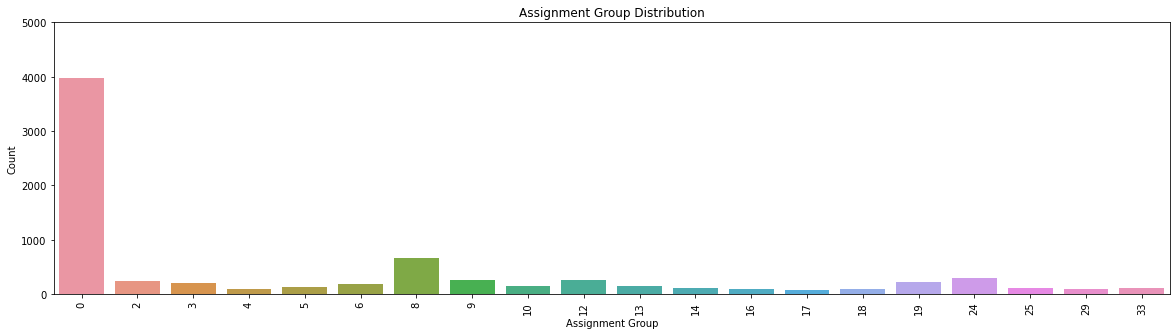

In [12]:
top_20 = df_processing['Assignment group'].value_counts().nlargest(20).reset_index()
plt.subplots(figsize=(20,5))
sns.barplot(x='index', y='Assignment group', data=top_20)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Assignment Group Distribution')
plt.ylim(0, 5000)
plt.show();

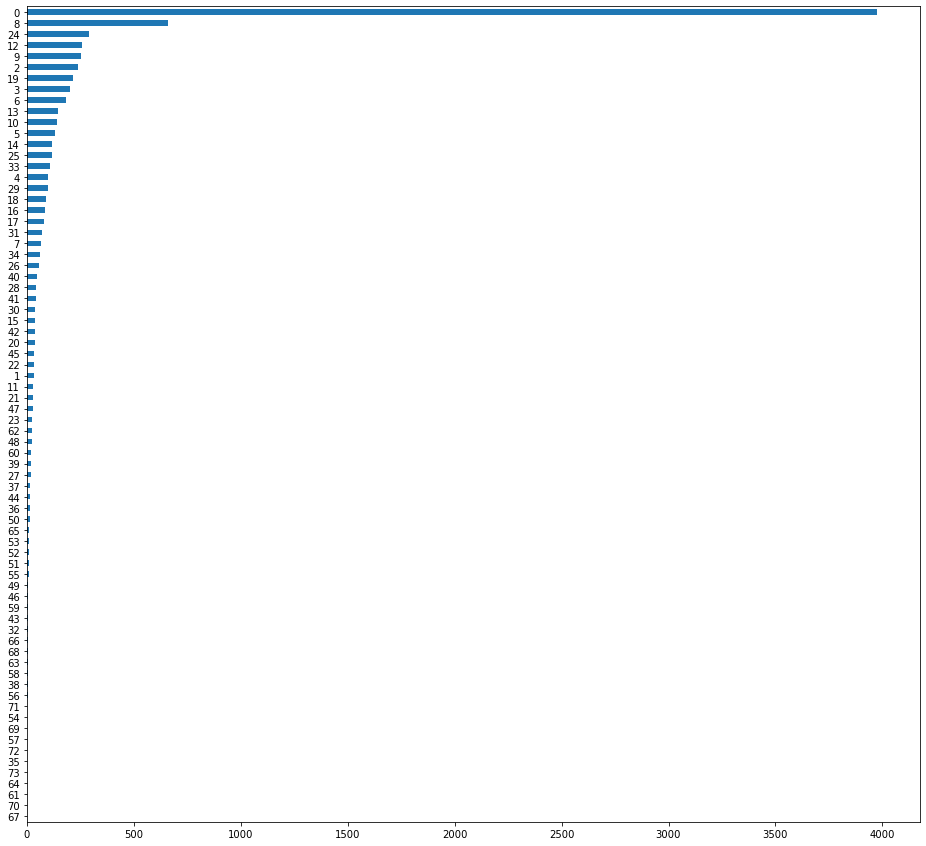

In [12]:

plt.figure(1,figsize=(16,15))
df_processing['Assignment group'].value_counts().sort_values().plot(kind = 'barh')

<h3> IMBALANCE ISSUE </h3>

- Group 0 has 46 % of records

- Fewer groups have more than 1 % of records

- other groups have less than 1% of records

In [13]:
value_count_df = df_processing['Assignment group'].value_counts().to_frame().reset_index()
value_count_df ['Per'] = df_processing['Assignment group'].value_counts(normalize=True)

In [15]:
GrpToBeMaintained = value_count_df[value_count_df['Assignment group'] >= 80]['index'].values

<h3> Percentage Distribution of Each Group </h3>

In [16]:
value_count_df[value_count_df['Assignment group'] >= 80]

index  Assignment group       Per
0       0              3976  0.467765
1       8               661  0.003647
2      24               289  0.028353
3      12               257  0.023529
4       9               252  0.011765
5       2               241  0.015176
6      19               215  0.021647
7       3               200  0.008000
8       6               184  0.077765
9      13               145  0.029647
10     10               140  0.016471
11      5               129  0.003529
12     14               118  0.030235
13     25               116  0.017059
14     33               107  0.013882
15      4               100  0.004588
16     29                97  0.010000
17     18                88  0.009529
18     16                85  0.010353
19     17                81  0.025294

In [17]:
GrpToBeMaintained

array([ 0,  8, 24, 12,  9,  2, 19,  3,  6, 13, 10,  5, 14, 25, 33,  4, 29,
       18, 16, 17], dtype=int64)

<h1 > Taking top 20 groups which has more than 80 records </h1>
   <h2> Dropping others to focus on classifying top 20 groups </h2>

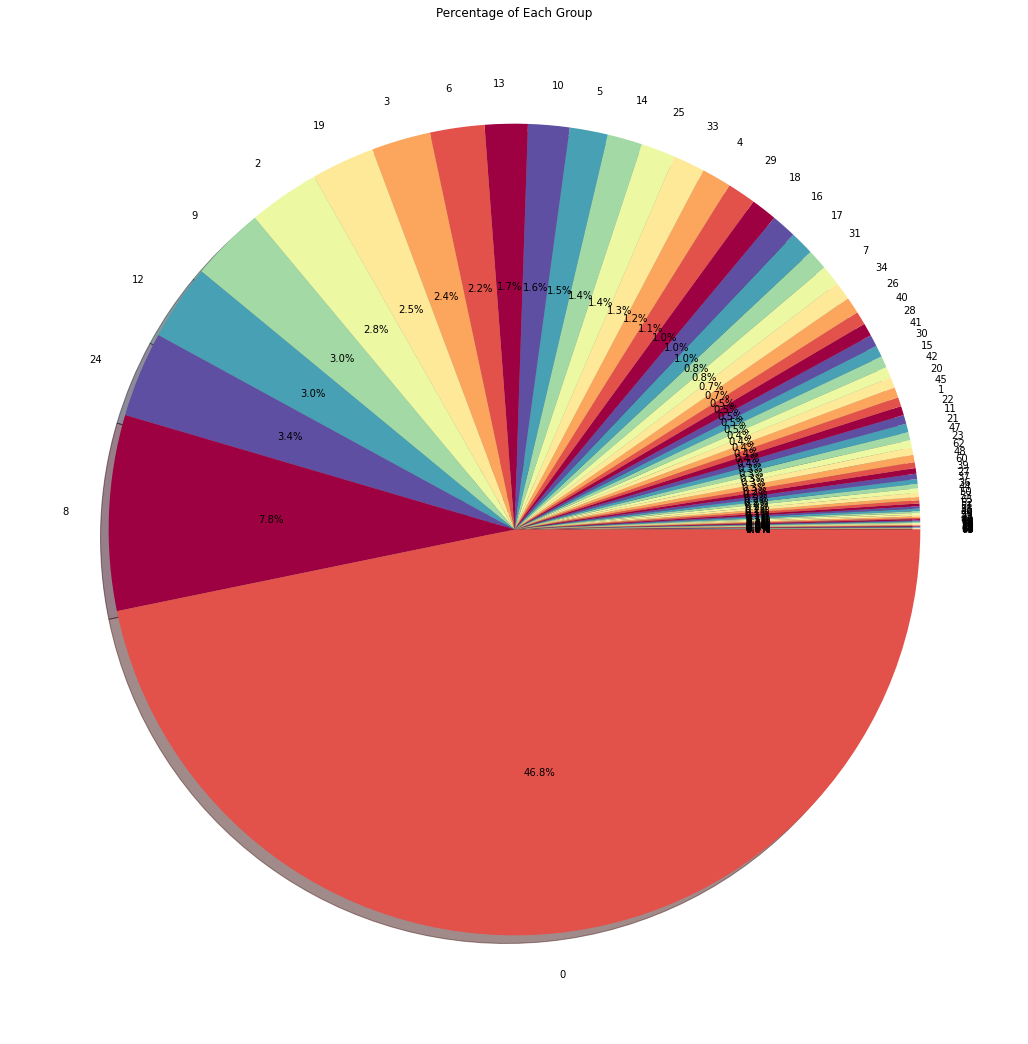

In [18]:
title_rating = df_processing.groupby('Assignment group').agg('count')
rating_labels = title_rating.text.sort_values().index 
rating_counts = title_rating.text.sort_values()
plt.figure(1, figsize=(40,70))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Percentage of Each Group')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [19]:
def assignGroup(x):
  if x in GrpToBeMaintained:
    val = x
  else:
    val = 100
  return val


In [20]:
df_sampled = df_processing[ df_processing['Assignment group'].isin(GrpToBeMaintained)]

In [21]:
df_sampled .isnull().sum()

text                0
Assignment group    0
dtype: int64

In [22]:
df_sampled

text  Assignment group
0     login issue -verified user details.(employee# ...                 0
1     outlook _x000D_\n_x000D_\nreceived from: hmjdr...                 0
2     cant log in to vpn _x000D_\n_x000D_\nreceived ...                 0
3     unable to access hr_tool page unable to access...                 0
4                             skype error  skype error                  0
...                                                 ...               ...
8493  erp fi  - ob09, two accounts to be added i am ...                10
8494  tablet needs reimaged due to multiple issues w...                 3
8495  emails not coming in from zz mail _x000D_\n_x0...                29
8496  telephony_software issue telephony_software issue                 0
8497  vip2: windows password reset for tifpdchb pedx...                 0

[7481 rows x 2 columns]

In [23]:
def wl(text):
    return len(text.split(" "))
fig_df = pd.DataFrame()
fig_df['word_length']=df_sampled['text'].apply(wl)
fig_df['char_length']=df_sampled['text'].apply(len)
fig_df['text']= df_sampled['text']
fig_df['Assignment group']= df_sampled['Assignment group']

In [24]:
fig_df[["text","word_length"]].sort_values(by = "word_length",ascending = False).head(10)

text  word_length
7345  security incidents - ( sw #in33501789 ) : broa...         1431
4089  security incidents - ( sw #in33895560 ) : mage...         1408
7989  security incidents - ( dsw #in33407676 ) : tra...         1364
7997  security incidents - ( sw #in33544563 ) : poss...         1303
3965  security incidents - ( #in33809307 ) : possibl...         1176
7984  security incidents - ( dsw #in33390850 ) : sus...         1027
7982  security incidents - ( dsw #in33390850 ) : sus...         1027
5092  security incidents - ( #in33578632) : suspicio...          958
5433  security incidents - ( #in33765965 ) : possibl...          934
7647  security incidents - ( #in33578632) : suspicio...          897

In [25]:
fig_df[["text","word_length"]].sort_values(by = "word_length",ascending = True).head(10)

text  word_length
3383      nan            1
4395      nan            1
3906      nan            1
3910      nan            1
3915      nan            1
3921      nan            1
3924      nan            1
4341      nan            1
3432  dds dss            2
1860      s s            2

In [26]:
fig_df[["text","char_length"]].sort_values(by = "char_length",ascending = False).head()

text  char_length
7345  security incidents - ( sw #in33501789 ) : broa...        14544
4089  security incidents - ( sw #in33895560 ) : mage...        12032
7984  security incidents - ( dsw #in33390850 ) : sus...        11372
7989  security incidents - ( dsw #in33407676 ) : tra...        10450
5092  security incidents - ( #in33578632) : suspicio...        10212

In [27]:
fig_df[["text","char_length"]].sort_values(by = "char_length",ascending = True).head()

text  char_length
3924  nan            3
3921  nan            3
3383  nan            3
4341  nan            3
3915  nan            3

In [28]:
df_nan = fig_df.loc[fig_df['word_length'] == 1]
#df.loc[df['column_name'] == some_value]

In [29]:
#df_processing[df_processing['text'].isna()]

df_nan

word_length  char_length text  Assignment group
3383            1            3  nan                 0
3906            1            3  nan                 0
3910            1            3  nan                 0
3915            1            3  nan                 0
3921            1            3  nan                 0
3924            1            3  nan                 0
4341            1            3  nan                 0
4395            1            3  nan                 0

<h3> Dropping Records containing null values </h3>

In [31]:
df_sampled.drop(df_nan.index)

text  Assignment group
0     login issue -verified user details.(employee# ...                 0
1     outlook _x000D_\n_x000D_\nreceived from: hmjdr...                 0
2     cant log in to vpn _x000D_\n_x000D_\nreceived ...                 0
3     unable to access hr_tool page unable to access...                 0
4                             skype error  skype error                  0
...                                                 ...               ...
8493  erp fi  - ob09, two accounts to be added i am ...                10
8494  tablet needs reimaged due to multiple issues w...                 3
8495  emails not coming in from zz mail _x000D_\n_x0...                29
8496  telephony_software issue telephony_software issue                 0
8497  vip2: windows password reset for tifpdchb pedx...                 0

[7473 rows x 2 columns]

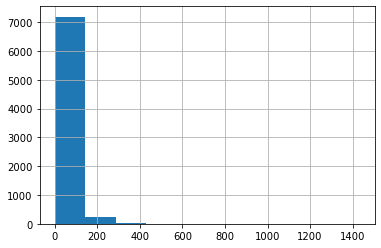

In [32]:
fig_df['word_length'].hist()

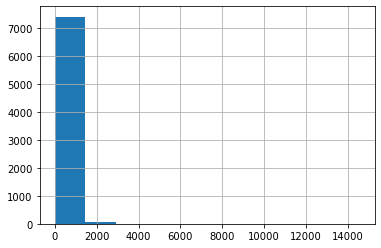

In [33]:
fig_df['char_length'].hist()

<h3> Word Length Inference on Each group </h3>

In [34]:
fig_df.groupby('Assignment group').agg({'word_length': ['mean', 'min', 'max']})

word_length          
                        mean min   max
Assignment group                      
0                  23.421278   1   478
2                 106.012448   8  1431
3                  41.390000   6   958
4                  54.640000   6   304
5                  37.984496   8   412
6                  27.798913   9   268
8                  75.417549   5   379
9                  29.337302   8   449
10                 34.621429   8   158
12                 47.105058   4  1027
13                 53.903448   4   252
14                 44.381356  10   348
16                 43.164706   9   192
17                 13.358025  10    68
18                 59.704545  10   361
19                 32.004651   4   618
24                 14.650519   8   121
25                 37.612069   6   215
29                 45.072165   7   190
33                 32.121495   4   264

<h3> Character Length Inference on Each group </h3>

In [35]:
fig_df.groupby('Assignment group').agg({'char_length': ['mean', 'min', 'max']})


char_length           
                        mean min    max
Assignment group                       
0                 176.196932   3   3463
2                 879.921162  37  14544
3                 293.905000  39  10212
4                 362.280000  37   1691
5                 273.480620  89   1784
6                 231.989130  55   1431
8                 462.183056  42   1906
9                 233.777778  53   1999
10                280.885714  55   1059
12                380.424125  29  11372
13                375.827586  31   1607
14                316.254237  47   2075
16                336.400000  67   1525
17                111.839506  82    436
18                424.284091  60   2323
19                248.944186  25   7631
24                114.525952  45   1113
25                312.448276  49   1911
29                334.865979  67   1680
33                237.383178  29   1458

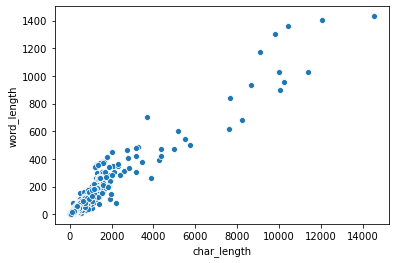

In [36]:
sns.scatterplot(x='char_length',y='word_length',data=fig_df)

In [37]:
stopwords = set(STOPWORDS)

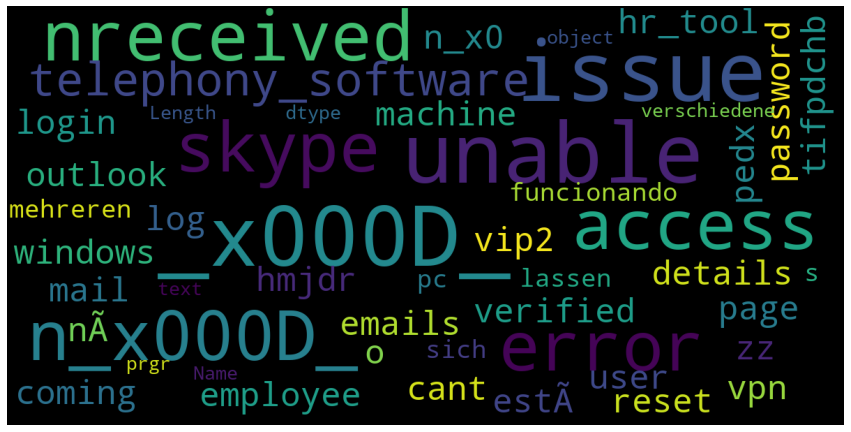

In [38]:


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

#show_wordcloud(df['reviews.text'])
show_wordcloud(df_processing['text'])

- We could infer that our document contains meaning less words

In [39]:
STOPWORDS = set(STOPWORDS)
words = set(nltk.corpus.words.words())
PUNCT_TO_REMOVE = string.punctuation
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

<h1> Text Preprocessing </h1>

    - Conversion into Lower case 
    - Remove URL from input
    - Remove html string from input
    - Remove Emoji from input
    - Remove special character from input
    - Remove punctuation from input
    - Remove Meaningless words
    - Remove stopwords
    - Lemmatisation

In [40]:
# Functions for preprocessing
def remove_upper_case( text):
        '''
        Function to transform upper string in title words
        @param text: (str) text 
        @return: (str) text without upper words 
        '''
        sentences = text.split("\n")
        new_sentences = []
        for i in sentences:
            words = text.split()
            stripped = [w.title() if w.isupper() else w for w in words]
            new_sentences.append(" ".join(stripped))
        return "\n".join(new_sentences)
def remove_URL( text):
        '''
        Function to remove url from text.
        @param text: (str) sentence
        @return: (str) clean text
        
        '''
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'',text)
    
    
def remove_html( text):
        '''
        Function regex to clean text from html balises.
        @param text: (str) sentence 
        @return: (str) clean text 
        '''
        html=re.compile(r'<.*?>')
        return html.sub(r'',text)
    
    

def remove_emoji( text):
        '''
        Function to remove emojis, symbols and pictograms etc from text
        @param text: (str) sentences 
        @return: (str) clean text 
        '''
        emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)

def remove_special_char( text):
        '''
        Function to remove emojis, symbols and pictograms etc from text
        @param text: (str) sentences 
        @return: (str) clean text 
        '''
        spcl_char_pattern = re.compile(r'[^`~!@#$%^&*()_+={}\[\]|\\:;“’<,>.?๐฿]*$')
        return spcl_char_pattern.sub(r'',text)
        return spcl_char_pattern.sub(r'', text)



def clean_sent_org(sent):
    return " ".join(w for w in nltk.wordpunct_tokenize(sent) \
     if w.lower() in words or not w.isalpha())
def clean_sent(sent):
    return " ".join(w for w in nltk.wordpunct_tokenize(sent) \
     if w.lower() in words )
    

def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))




def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])




def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

#df["text_lemmatized"] = df["text"].apply(lambda text: lemmatize_words(text))


In [41]:
TEXT = 'text'
df_sampled[TEXT] = df_sampled[TEXT].apply(remove_upper_case)
df_sampled[TEXT] = df_sampled[TEXT].apply(remove_URL)
df_sampled[TEXT] = df_sampled[TEXT].apply(remove_html)
df_sampled[TEXT] = df_sampled[TEXT].apply(remove_emoji)
df_sampled[TEXT] = df_sampled[TEXT].apply(remove_special_char)
df_sampled[TEXT] = df_sampled[TEXT].apply(clean_sent)
df_sampled[TEXT] = df_sampled[TEXT].apply( remove_punctuation)
df_sampled[TEXT] = df_sampled[TEXT].apply( remove_stopwords)
df_sampled[TEXT] = df_sampled[TEXT].apply(lemmatize_words)

In [42]:
df_sampled[TEXT] = df_sampled[TEXT].str.strip().replace('', 'NaN')
df_sampled[df_sampled[TEXT]=='NaN']

text  Assignment group
4     NaN                 0
5     NaN                 0
8     NaN                 0
10    NaN                 0
13    NaN                 0
...   ...               ...
8473  NaN                 0
8474  NaN                 0
8485  NaN                 0
8489  NaN                 0
8494  NaN                 3

[1545 rows x 2 columns]

<h3> Dropping null values after preproceesing Text </h3>

In [43]:
df_sampled = df_sampled[df_sampled[TEXT] != 'NaN']

In [44]:
df_sampled

text  Assignment group
0     login issue user employee manager name check u...                 0
1     outlook receive hello team outlook calendar so...                 0
2     cant log receive log best cant log receive log...                 0
3                      unable access page unable access                 0
7     employment status new non employee enter user ...                 0
...                                                 ...               ...
8492                                             option                 0
8493  fi two add sorry another two need add please c...                10
8495  come mail receive good afternoon send mail ple...                29
8496                                              issue                 0
8497                                     password reset                 0

[5936 rows x 2 columns]

In [45]:
top_20_grp = df_sampled['Assignment group'].value_counts().nlargest(20).index

<h2> Word cloud for Top 20 Groups </h2>

Word cloud for class  0


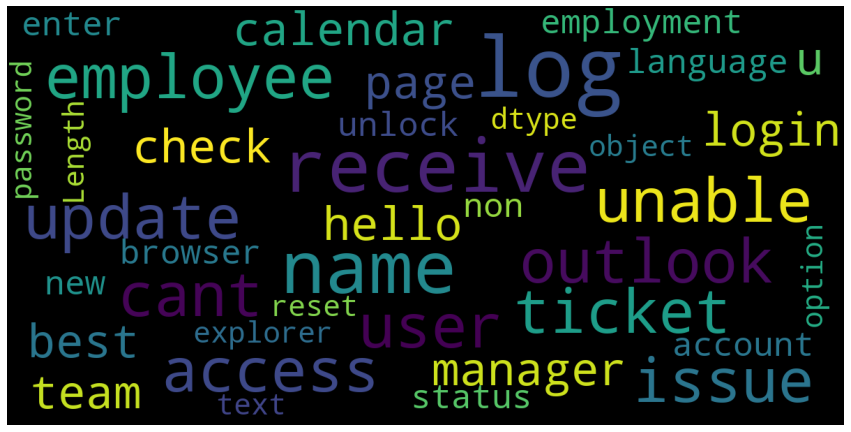

Word cloud for class  8


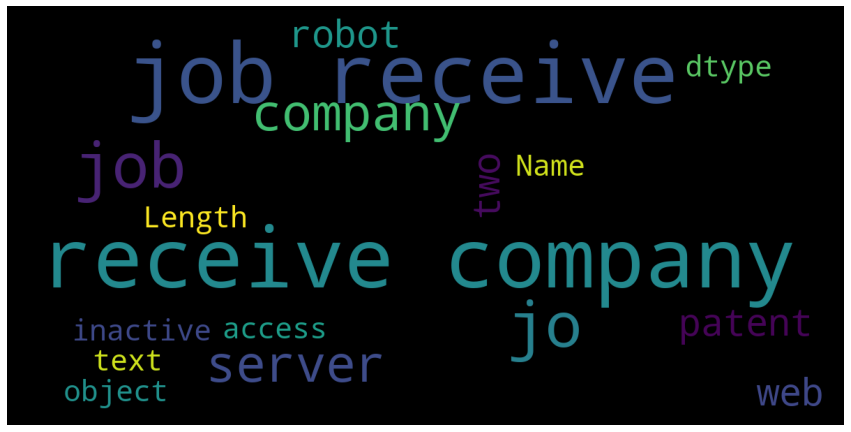

Word cloud for class  12


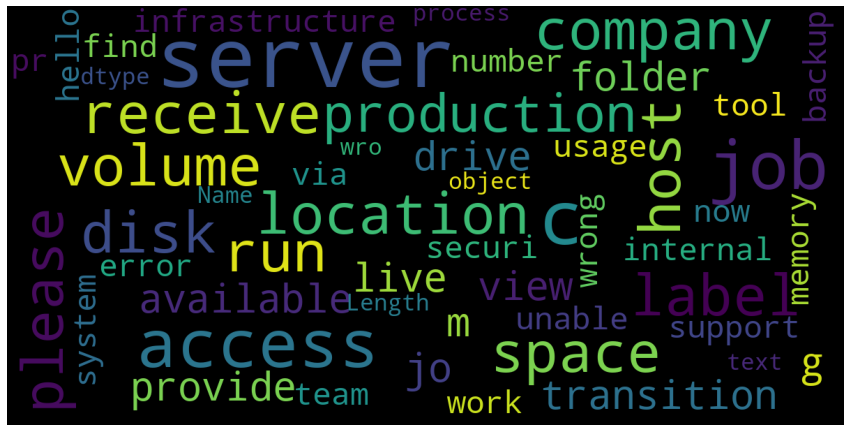

Word cloud for class  9


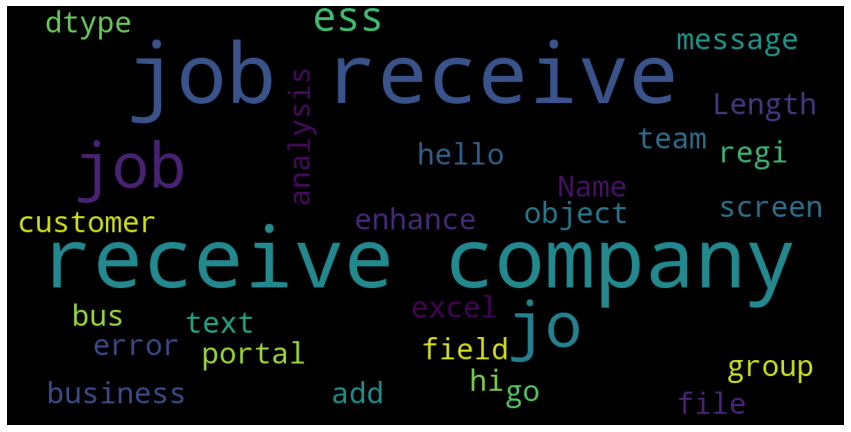

Word cloud for class  2


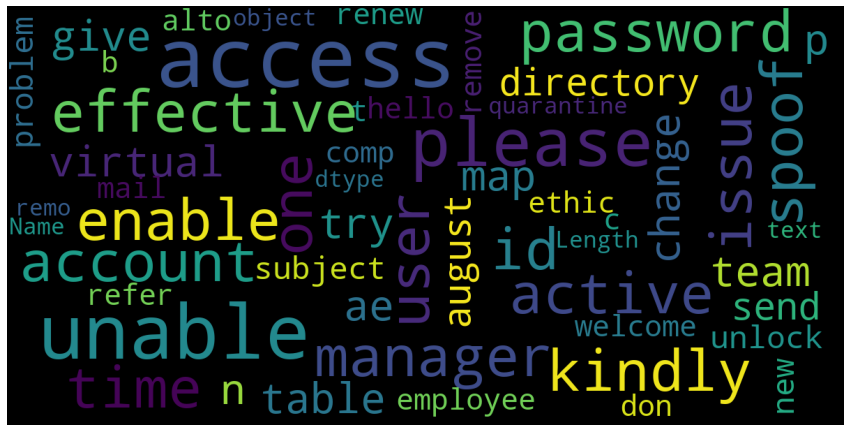

Word cloud for class  24


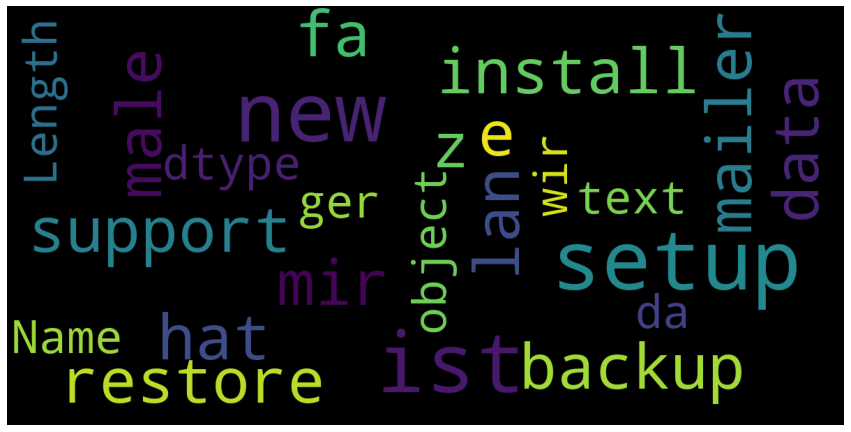

Word cloud for class  6


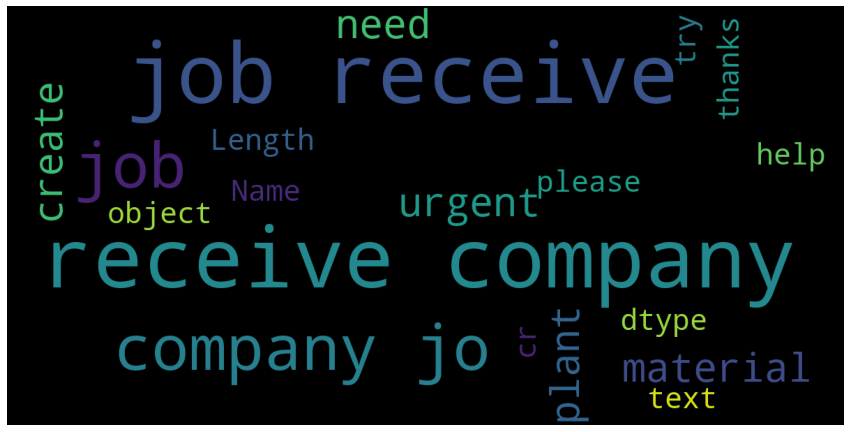

Word cloud for class  3


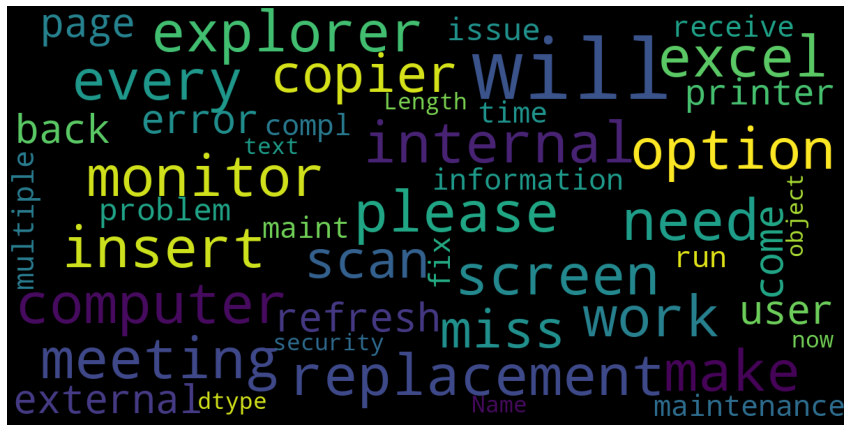

Word cloud for class  19


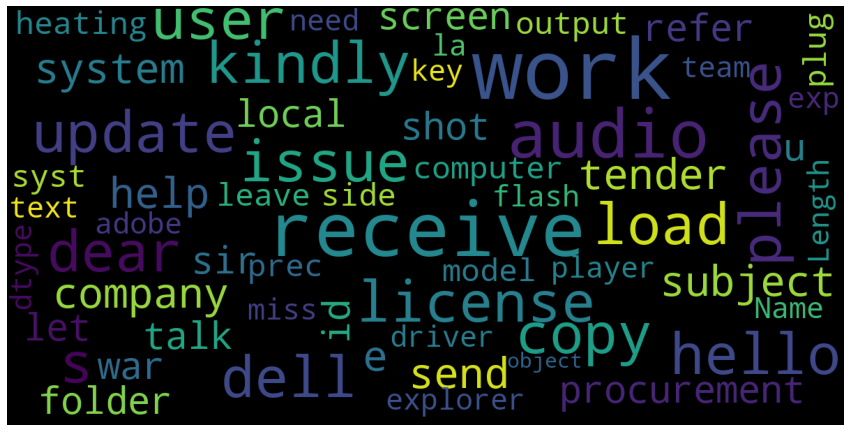

Word cloud for class  13


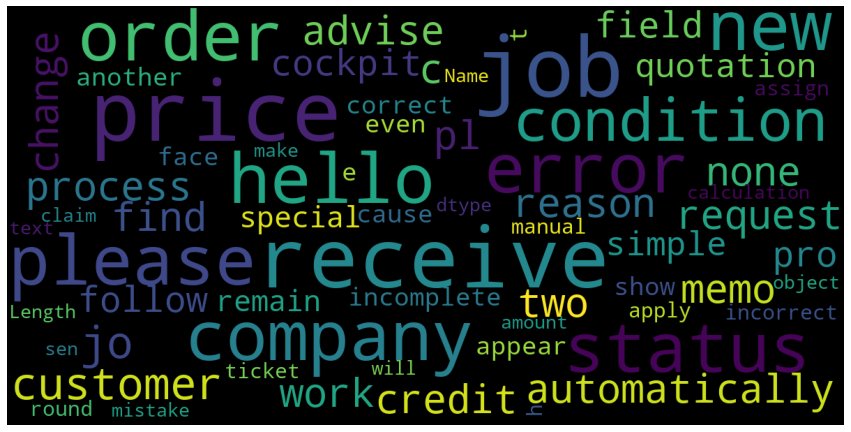

Word cloud for class  10


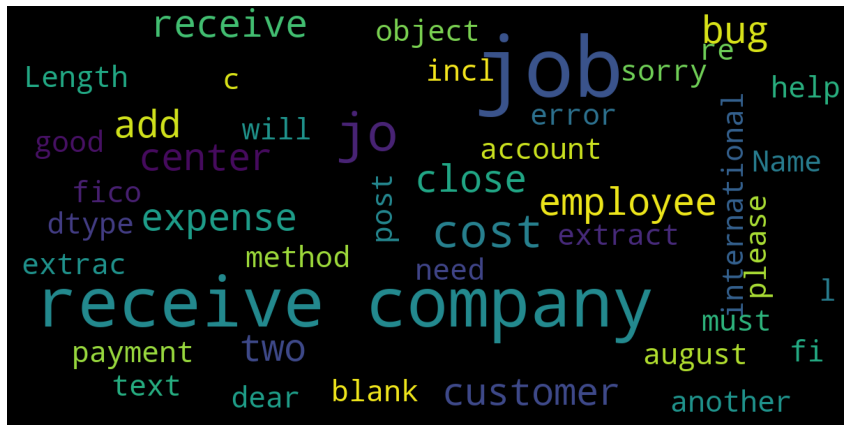

Word cloud for class  5


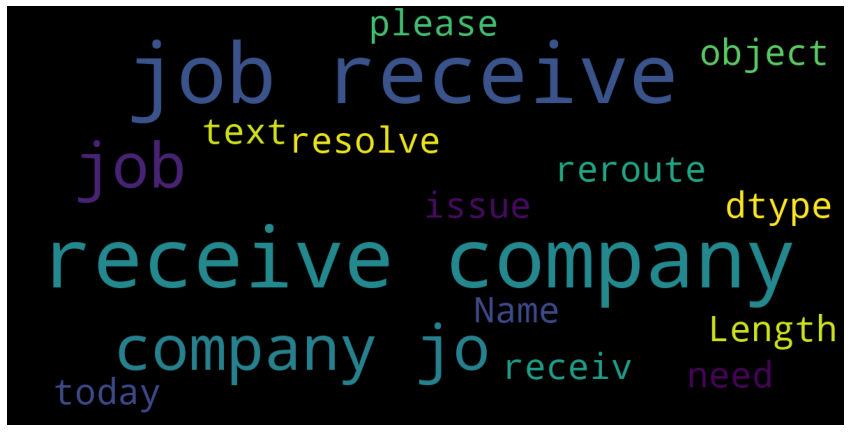

Word cloud for class  14


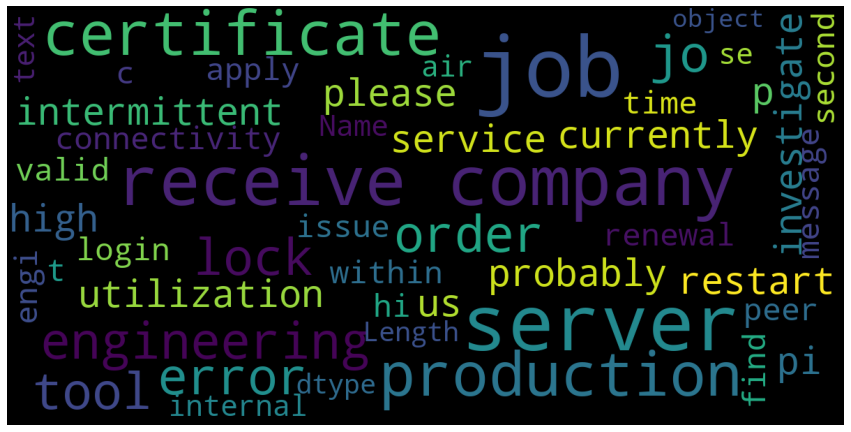

Word cloud for class  25


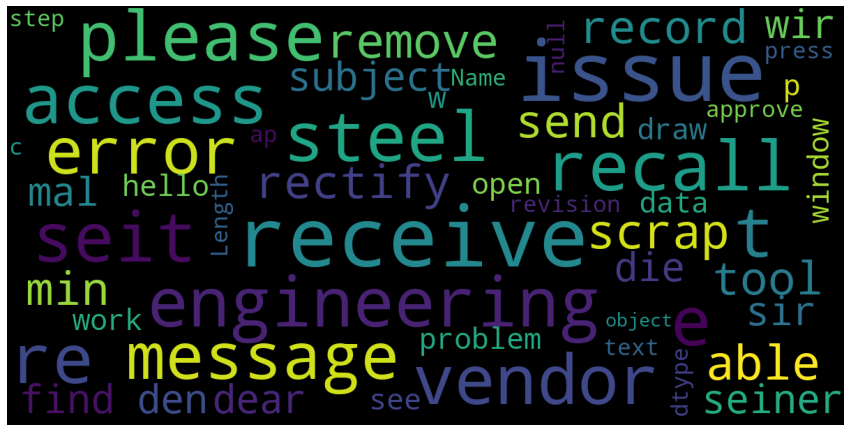

Word cloud for class  4


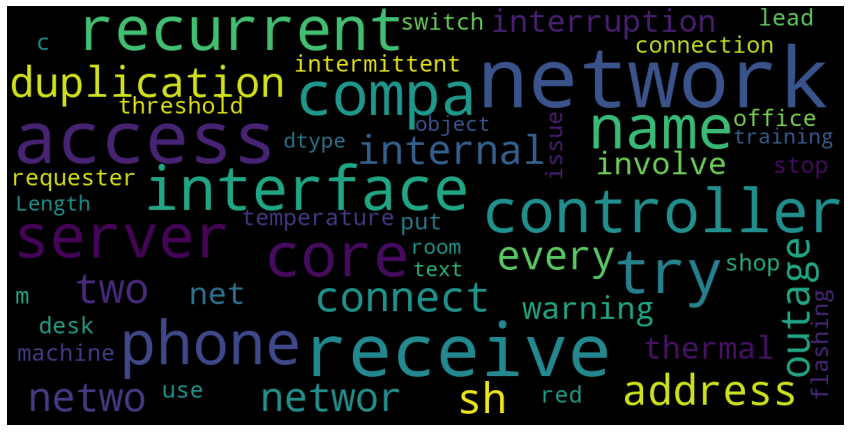

Word cloud for class  29


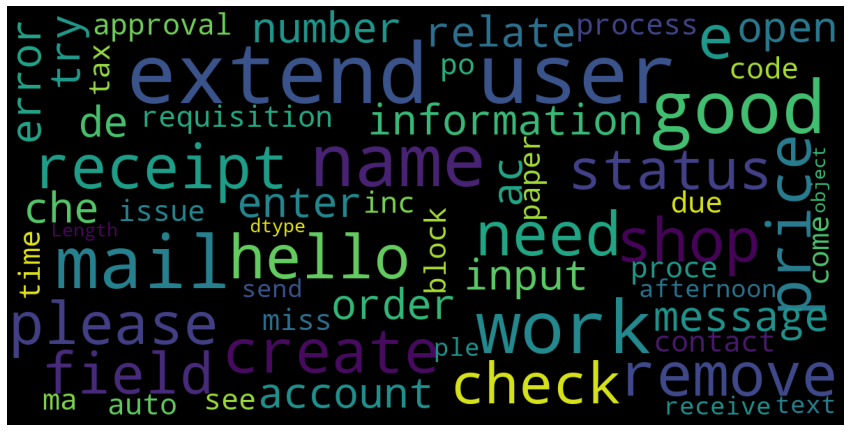

Word cloud for class  18


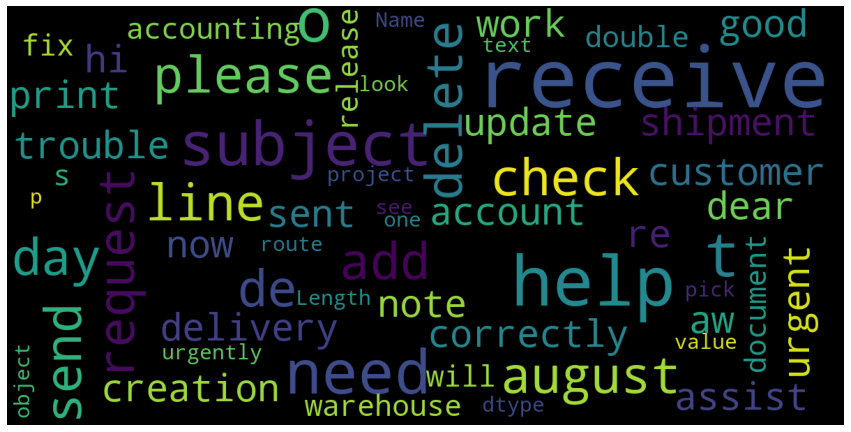

Word cloud for class  17


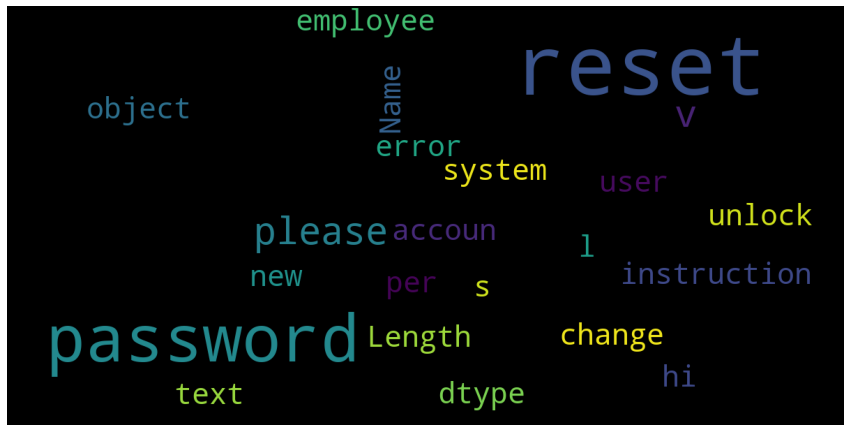

Word cloud for class  16


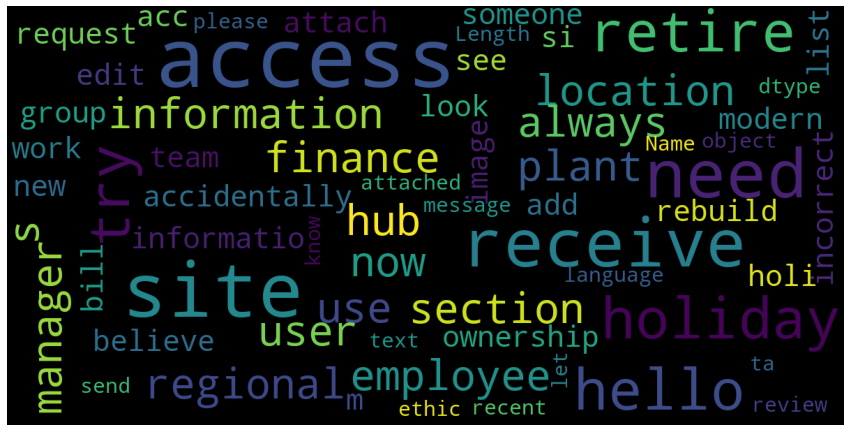

Word cloud for class  33


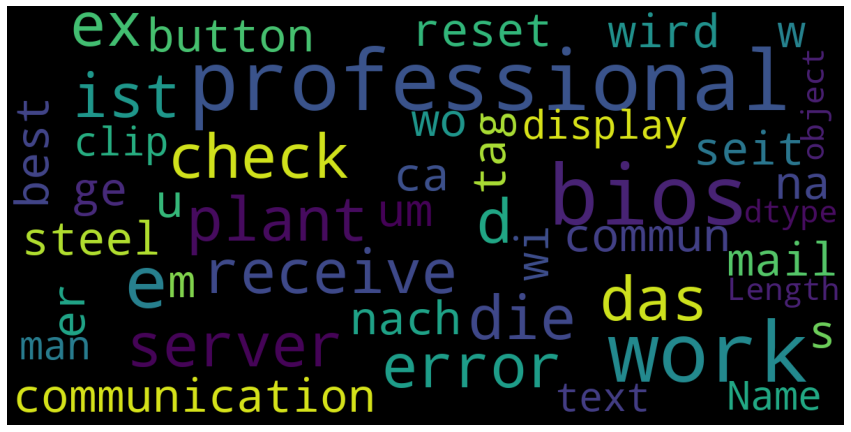

In [46]:
for i in top_20_grp.values:
  print("Word cloud for class ",i)
  show_wordcloud(df_sampled[df_sampled['Assignment group'] == i]['text'])

<h1> Frequent words used in Top 20 groups </h1>

In [47]:
def plt_freq_words(all_lines):
  
  filtered_words = [word for word in all_lines.split() ]
  counted_words = collections.Counter(filtered_words)
  words = []
  counts = []
  for letter, count in counted_words.most_common(20):
      words.append(letter)
      counts.append(count)
  colors = cm.rainbow(np.linspace(0, 1, 20))
  rcParams['figure.figsize'] = 20, 10
  plt.title('Top words in the headlines vs their count')
  plt.xlabel('Count')
  plt.ylabel('Words')
  plt.barh(words, counts, color=colors)

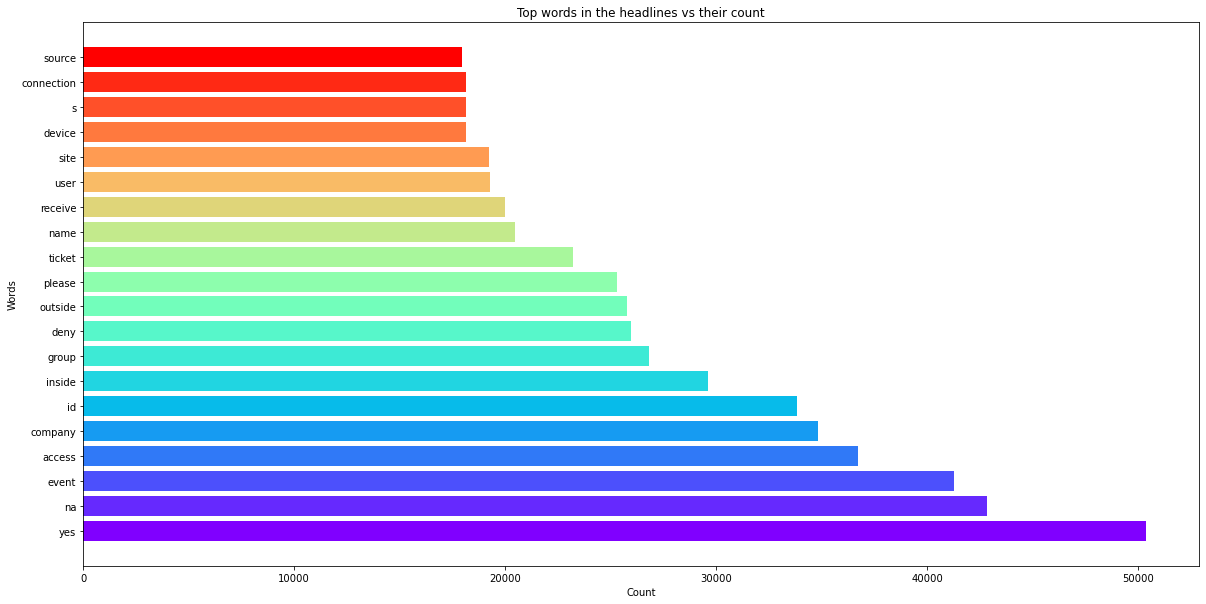

In [48]:
plt_freq_words( ' '.join(df_sampled['text'].str.lower()))

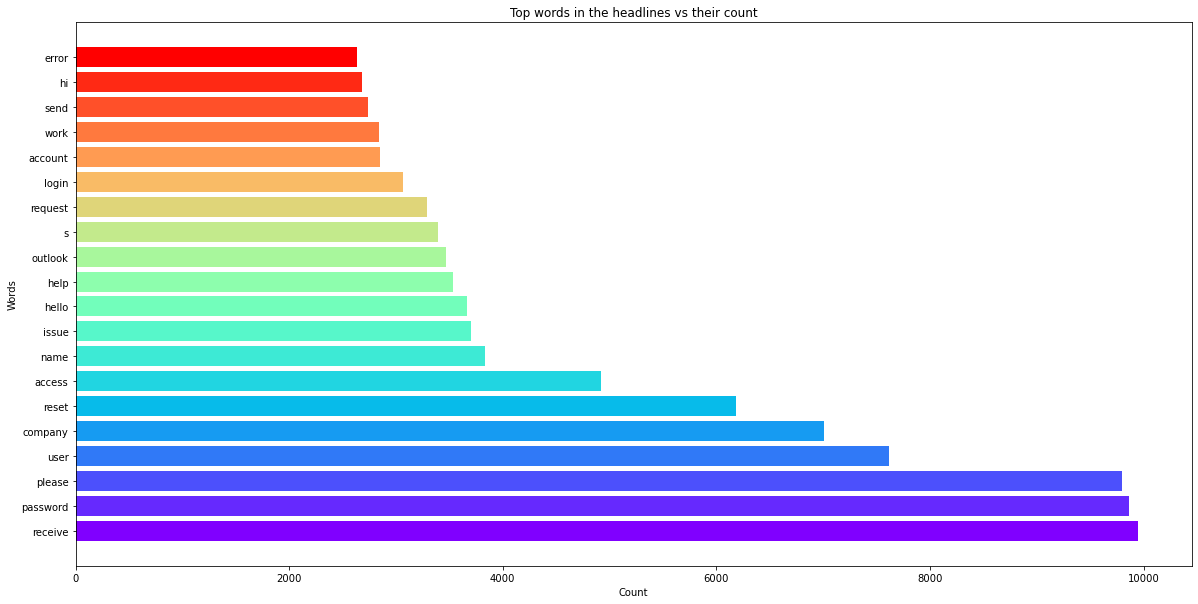

In [49]:
plt_freq_words(' '.join(df_sampled[df_sampled['Assignment group'] == 0]['text'].str.lower()))

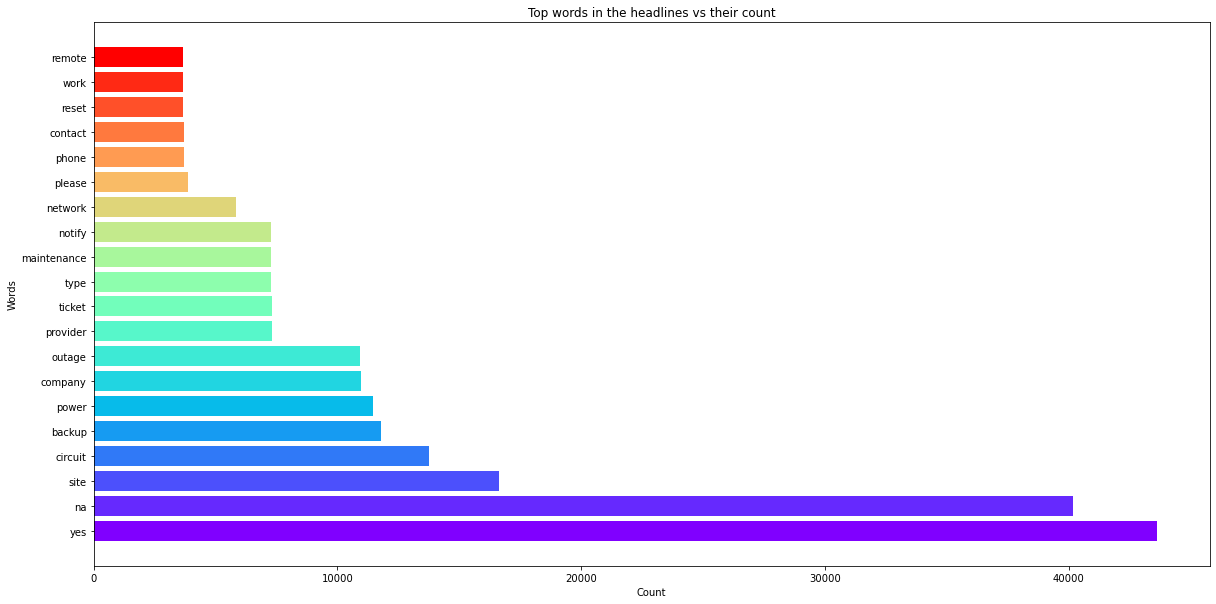

In [50]:
plt_freq_words(' '.join(df_sampled[df_sampled['Assignment group'] == 8]['text'].str.lower()))

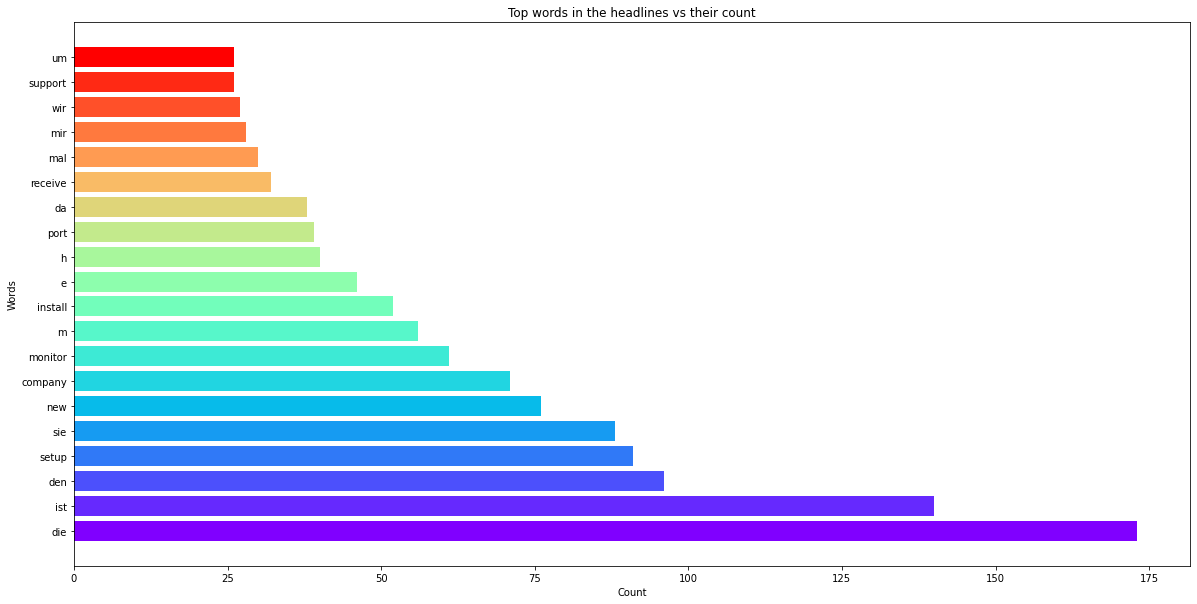

In [51]:
plt_freq_words(' '.join(df_sampled[df_sampled['Assignment group'] == 24]['text'].str.lower()))

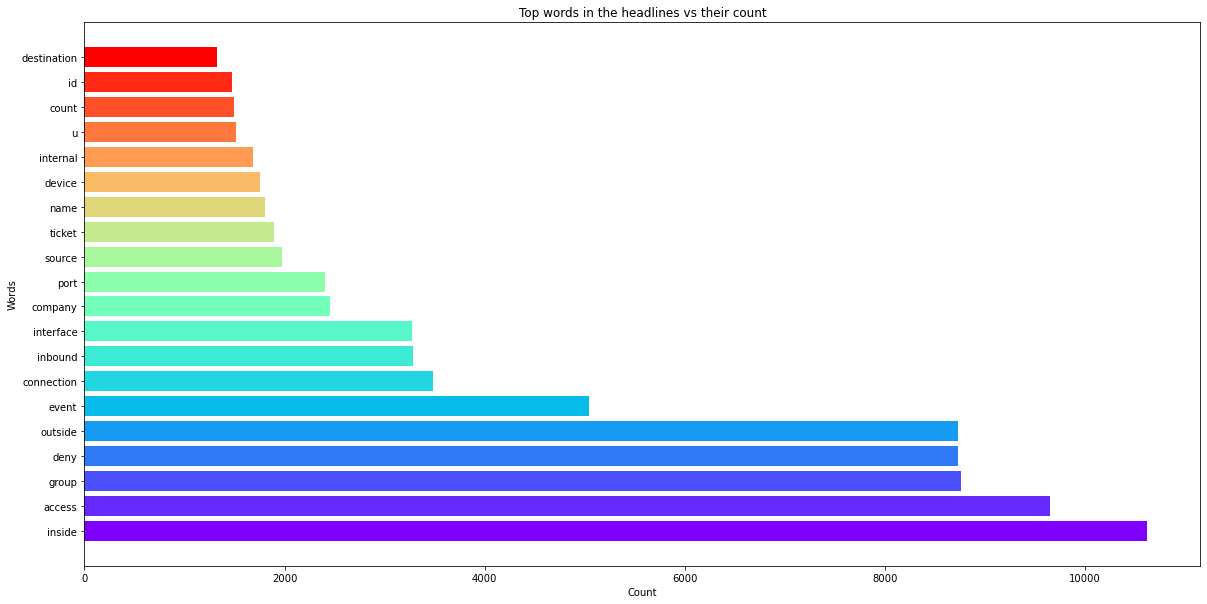

In [52]:
plt_freq_words(' '.join(df_sampled[df_sampled['Assignment group'] == 12]['text'].str.lower()))

<h1> Creating unigrams </h1>



In [405]:
def generate_N_grams(text,ngram):
  words=[word for word in text.split(" ") if word not in STOPWORDS]  
  #print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [406]:
Grp0Values=defaultdict(int)
Grp8Values=defaultdict(int)
Grp24Values=defaultdict(int)
Grp12Values=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [407]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_sampled[df_sampled['Assignment group']==0].text:
  for word in generate_N_grams(text,1):
    Grp0Values[word]+=1

In [408]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_sampled[df_sampled['Assignment group']==8].text:
  for word in generate_N_grams(text,1):
    Grp8Values[word]+=1

In [409]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_sampled[df_sampled['Assignment group']==24].text:
  for word in generate_N_grams(text,1):
    Grp24Values[word]+=1

In [410]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_sampled[df_sampled['Assignment group']==12].text:
  for word in generate_N_grams(text,1):
    Grp12Values[word]+=1

In [411]:

df_0Values=pd.DataFrame(sorted(Grp0Values.items(),key=lambda x:x[1],reverse=True))
df_8Values=pd.DataFrame(sorted(Grp8Values.items(),key=lambda x:x[1],reverse=True))
df_24Values=pd.DataFrame(sorted(Grp24Values.items(),key=lambda x:x[1],reverse=True))
df_12Values=pd.DataFrame(sorted(Grp12Values.items(),key=lambda x:x[1],reverse=True))

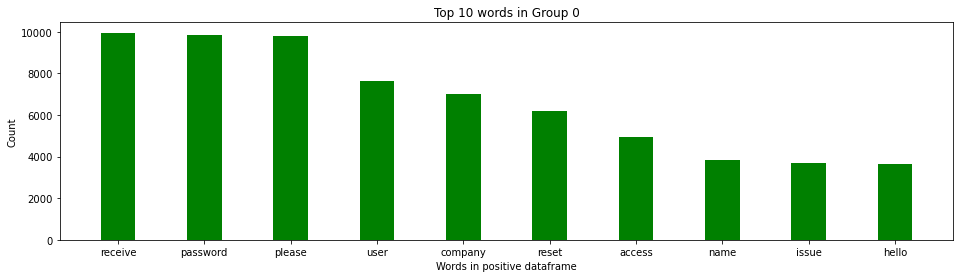

In [412]:
plt.figure(1,figsize=(16,4))
plt.bar(df_0Values[0][:10],df_0Values[1][:10], color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Group 0")
plt.savefig("positive-unigram.png")
plt.show()

<h1> Creating bigrams </h1>


In [413]:
Grp0Values_2=defaultdict(int)
Grp8Values_2=defaultdict(int)
Grp24Values_2=defaultdict(int)
Grp12Values_2=defaultdict(int)

In [414]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_sampled[df_sampled['Assignment group']==0].text:
  for word in generate_N_grams(text,2):
    Grp0Values_2[word]+=1

In [415]:
for text in df_sampled[df_sampled['Assignment group']==8].text:
  for word in generate_N_grams(text,2):
    Grp8Values_2[word]+=1

In [416]:
for text in df_sampled[df_sampled['Assignment group']==24].text:
  for word in generate_N_grams(text,2):
    Grp24Values_2[word]+=1

In [417]:
for text in df_sampled[df_sampled['Assignment group']==12].text:
  for word in generate_N_grams(text,2):
    Grp12Values_2[word]+=1

In [418]:
df_0Values_2=pd.DataFrame(sorted(Grp0Values_2.items(),key=lambda x:x[1],reverse=True))
df_8Values_2=pd.DataFrame(sorted(Grp8Values_2.items(),key=lambda x:x[1],reverse=True))
df_24Values_2=pd.DataFrame(sorted(Grp24Values_2.items(),key=lambda x:x[1],reverse=True))
df_12Values_2=pd.DataFrame(sorted(Grp12Values_2.items(),key=lambda x:x[1],reverse=True))

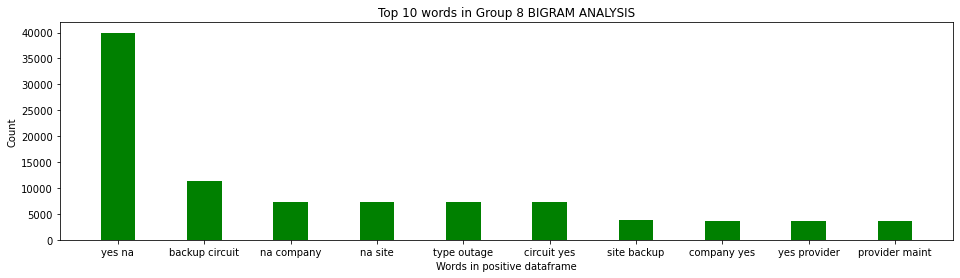

In [419]:
plt.figure(1,figsize=(16,4))
plt.bar(df_8Values_2[0][:10],df_8Values_2[1][:10], color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Group 8 BIGRAM ANALYSIS")
plt.savefig("bigram8.png")
plt.show()

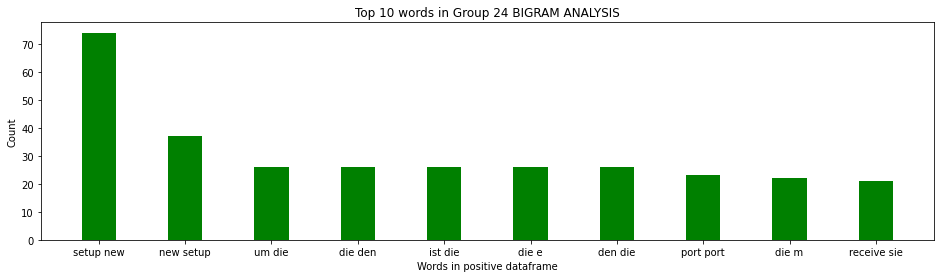

In [420]:
plt.figure(1,figsize=(16,4))
plt.bar(df_24Values_2[0][:10],df_24Values_2[1][:10], color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Group 24 BIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

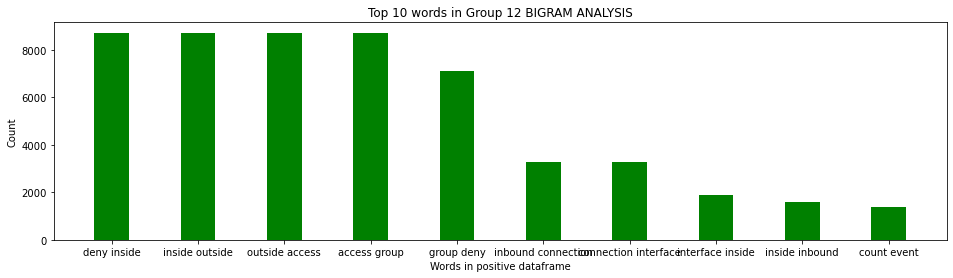

In [421]:
plt.figure(1,figsize=(16,4))
plt.bar(df_12Values_2[0][:10],df_12Values_2[1][:10], color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Group 12 BIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

<h1> Creating Trigrams </h1>

In [422]:
Grp0Values_3=defaultdict(int)
Grp8Values_3=defaultdict(int)
Grp24Values_3=defaultdict(int)
Grp12Values_3=defaultdict(int)

In [423]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_sampled[df_sampled['Assignment group']==0].text:
  for word in generate_N_grams(text,3):
    Grp0Values_3[word]+=1

In [424]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_sampled[df_sampled['Assignment group']==8].text:
  for word in generate_N_grams(text,3):
    Grp8Values_3[word]+=1

In [425]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_sampled[df_sampled['Assignment group']==24].text:
  for word in generate_N_grams(text,3):
    Grp24Values_3[word]+=1

In [426]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_sampled[df_sampled['Assignment group']==12].text:
  for word in generate_N_grams(text,3):
    Grp12Values_3[word]+=1

In [427]:
df_0Values_3=pd.DataFrame(sorted(Grp0Values_3.items(),key=lambda x:x[1],reverse=True))
df_8Values_3=pd.DataFrame(sorted(Grp8Values_3.items(),key=lambda x:x[1],reverse=True))
df_24Values_3=pd.DataFrame(sorted(Grp24Values_3.items(),key=lambda x:x[1],reverse=True))
df_12Values_3=pd.DataFrame(sorted(Grp12Values_3.items(),key=lambda x:x[1],reverse=True))

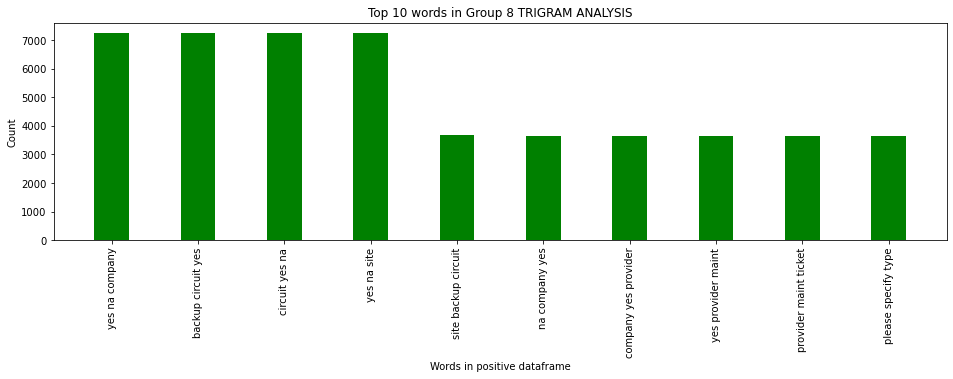

In [428]:
plt.figure(1,figsize=(16,4))
plt.bar(df_8Values_3[0][:10],df_8Values_3[1][:10], color ='green',
        width = 0.4)
plt.xticks(rotation=90)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Group 8 TRIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

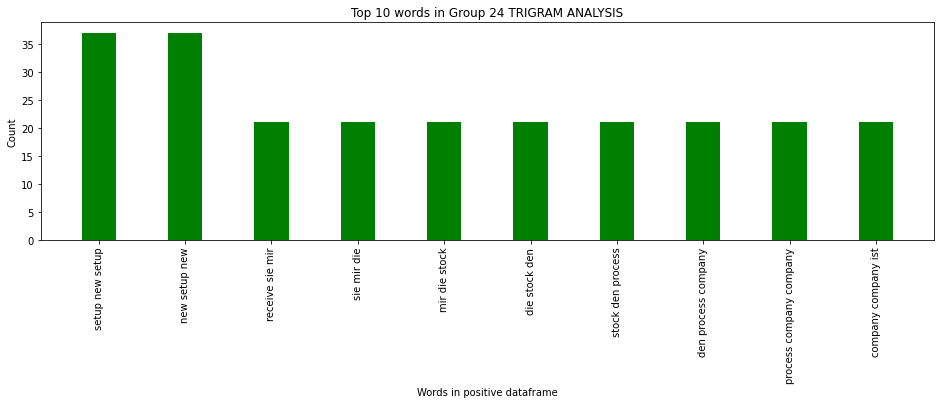

In [429]:
plt.figure(1,figsize=(16,4))
plt.bar(df_24Values_3[0][:10],df_24Values_3[1][:10], color ='green',
        width = 0.4)
plt.xticks(rotation=90)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Group 24 TRIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

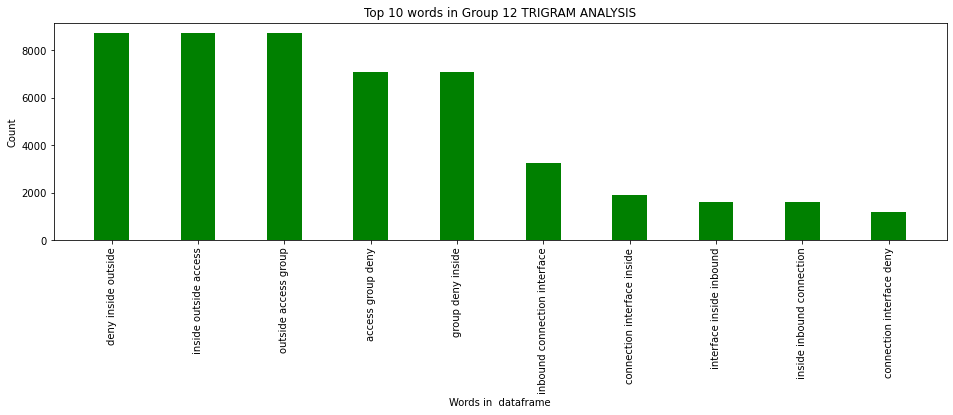

In [430]:
plt.figure(1,figsize=(16,4))
plt.bar(df_12Values_3[0][:10],df_12Values_3[1][:10], color ='green',
        width = 0.4)
plt.xticks(rotation=90)
plt.xlabel("Words in  dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Group 12 TRIGRAM ANALYSIS")
plt.savefig("Trigram_12.png")
plt.show()


<h2> Text Augmentation </h2>

In [56]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.word as naw
#aug = nac.KeyboardAug()

In [58]:
 aug = naw.SynonymAug()
 aug.augment("tomorrow is working day")

'tomorrow is work mean solar day'

In [59]:
from random import shuffle

In [60]:
def augment_text(df,samples,Grp_No):
    #aug_w2v.aug_p=pr
    #new_text=[]
    
    ##selecting the minority class samples
    df_n=df[df['Assignment group']==Grp_No].reset_index(drop=True)
    #print(len(df_n))

    ## data augmentation loop
    for i in tqdm(np.random.randint(0,len(df_n),samples)):
            #print(i)
            text = df_n.iloc[i]['text']
            #print(" text"+ text)
            new_text = aug.augment(text)
            #print(new_text+ "aug text" )
            #new_text.append(augmented_text)
            #print("donr")
            new=pd.DataFrame({'text':[new_text],'Assignment group':[Grp_No]})
            df_n=(df_n.append(new).reset_index(drop=True))
    
    
    ## dataframe
    
   
    return df_n

<h1> Upsampling Minority class using Text Augmentation <h1>

In [62]:
df_grp_8 = augment_text(df_sampled,200,8)
df_grp_12 = augment_text(df_sampled,400,12)
df_grp_9 = augment_text(df_sampled,400,9)
df_grp_2 = augment_text(df_sampled,400,2)
df_grp_24 = augment_text(df_sampled,400,24)
df_grp_6 = augment_text(df_sampled,400,6)
df_grp_3 = augment_text(df_sampled,500,3)
df_grp_19 = augment_text(df_sampled,500,19)
df_grp_13 = augment_text(df_sampled,500,13)
df_grp_10 = augment_text(df_sampled,500,10)
df_grp_5 = augment_text(df_sampled,500,5)
df_grp_14 = augment_text(df_sampled,500,14)
df_grp_25 = augment_text(df_sampled,500,25)
df_grp_4 = augment_text(df_sampled,500,4)
df_grp_29 = augment_text(df_sampled,500,29)
df_grp_18 = augment_text(df_sampled,500,18)
df_grp_17 = augment_text(df_sampled,500,17)
df_grp_16 = augment_text(df_sampled,500,16)
df_grp_33 = augment_text(df_sampled,500,33)


100%|██████████| 500/500 [00:08<00:00, 57.76it/s] 


<h1> Class Distribution after resolving </h1>
<h2> - Downsampling majority class and upsampling minority class </h2>

In [63]:
df_grp_0 = df_sampled[df_sampled['Assignment group']==0].sample(1000)

In [301]:
df_model = pd.concat([df_grp_8, df_grp_12, df_grp_9,df_grp_2,df_grp_24,df_grp_6,df_grp_3 ,df_grp_19,df_grp_13,df_grp_10,df_grp_5,df_grp_14,df_grp_25,df_grp_4,df_grp_29,df_grp_18,df_grp_17,df_grp_16,df_grp_33,df_grp_0 ])

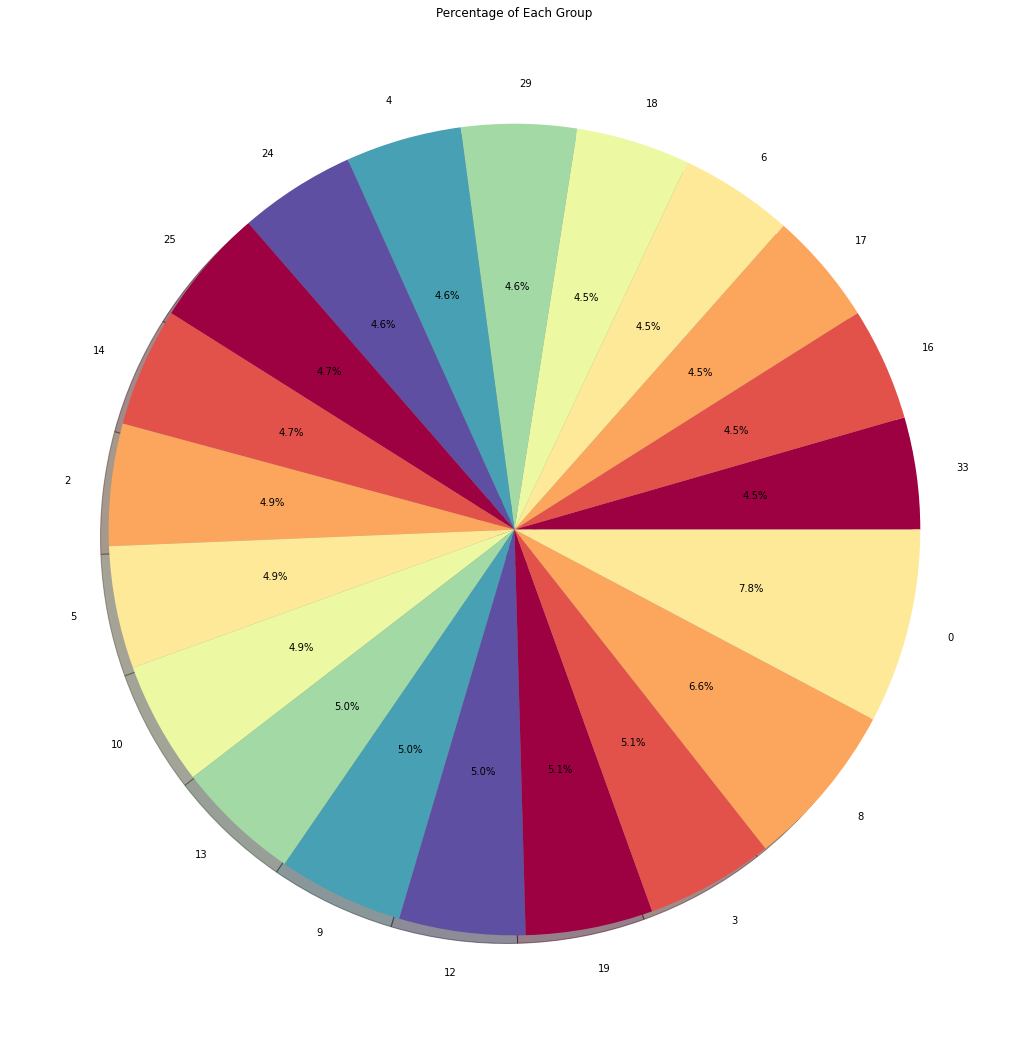

In [302]:
title_rating = df_model.groupby('Assignment group').agg('count')
rating_labels = title_rating.text.sort_values().index 
rating_counts = title_rating.text.sort_values()
plt.figure(1, figsize=(40,70))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Percentage of Each Group')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [326]:
df_model

text  Assignment group
0     job receive company job job receive company jo...                 8
1     job receive company job job receive company jo...                 8
2     job receive company job job receive company jo...                 8
3     company two company two company company access...                 8
4     job receive company job job receive company jo...                 8
...                                                 ...               ...
7453  outlook spell check error repeat issue receive...                 0
7143  issue connect user system outlook caller confi...                 0
5746                                       account lock                 0
2614  problem access urgent receive dear issue repea...                 0
736   unable call receive tried call morning option ...                 0

[12899 rows x 2 columns]

In [68]:
LABEL = 'Assignment group'
from sklearn.utils import class_weight

<h3> Split Training , validation and Test data </h3>

In [307]:
train_x, rem_x, train_y, rem_y = model_selection.train_test_split(df_model[TEXT], df_model[LABEL], random_state=42, stratify=df_model[LABEL], train_size=0.8)
valid_x, test_x, valid_y, test_y = model_selection.train_test_split(rem_x,rem_y, test_size=0.5,random_state=42)
train_x_org, rem_x_org, train_y_org, rem_y_org = model_selection.train_test_split(df_sampled[TEXT], df_sampled[LABEL], random_state=42, stratify=df_sampled[LABEL], train_size=0.8)
valid_x_org, test_x_org, valid_y_org, test_y_org = model_selection.train_test_split(rem_x_org, rem_y_org, random_state=42, train_size=0.5)

In [327]:
df_results = pd.DataFrame()

In [308]:
def apply_pca (X):
  cov_matrix_1 = np.cov(X.T)
  #print("covariance matrix of part 2\n",cov_matrix_3)
  eigen_value_1, eigen_vector_1 = np.linalg.eig(cov_matrix_1)
  #how to find cumuative variance in PCA
  tol_1 = sum(eigen_value_1)
  var_eigen_value  = [(i/tol_1) * 100 for i in sorted(eigen_value_1,reverse = True)]

  cum_eigen_val = np.cumsum(var_eigen_value)
  #print("cumulative variance",cum_eigen_val)
  plt.plot(cum_eigen_val)
  return eigen_value_1,var_eigen_value,cum_eigen_val
 


<h1> Count Vectorisation </h1>

In [317]:
def apply_count_vect(xtrain,xvalid,xtest):
  count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}',max_features = 300)
  count_vect.fit(xtrain)

  # transform the training and validation data using count vectorizer object
  xtraincount =  count_vect.transform(xtrain).toarray()
  xvalidcount =  count_vect.transform(xvalid).toarray()
  xtestcount =   count_vect.transform(xtest).toarray()
  return xtraincount,xvalidcount,xtestcount

<h1> TF - IDF Vectorisation </h1>

In [318]:
def apply_tf_idf_vect(xtrain,xvalid,xtest):
  tfidf_vect = TfidfVectorizer(ngram_range = (1,3),max_features = 300)
  tfidf_vect.fit(xtrain)
  # word level tf-idf
  #tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=10000)
  tfidf_vect_train =  tfidf_vect .transform(xtrain)
  tfidf_vect_val =  tfidf_vect .transform(xvalid)
  tfidf_vect_test =   tfidf_vect .transform(xtest)
  return tfidf_vect_train.toarray(),tfidf_vect_val.toarray(),tfidf_vect_test.toarray()

In [311]:
def fit_pca(n_component,x_train,x_test,x_val):
  pca_1 = PCA(n_components = n_component, random_state = 1)
  pca_1.fit(x_train)
  x_train_pca = pca_1.fit_transform(x_train)
  x_test_pca = pca_1.transform(x_test)
  x_valid_pca = pca_1.transform(x_val)
  return x_train_pca,x_test_pca,x_valid_pca

In [312]:
def fit_tokenizer(xtrain,xvalid,xtest):
  token = Tokenizer()
  token.fit_on_texts(xtrain)
  word_index = token.word_index

  # convert text to sequence of tokens and pad them to ensure equal length vectors 
  train_seq = sequence.pad_sequences(token.texts_to_sequences(xtrain), maxlen=300)
  valid_seq = sequence.pad_sequences(token.texts_to_sequences(xvalid), maxlen=300)
  test_seq = sequence.pad_sequences(token.texts_to_sequences(xtest), maxlen=300)
  return train_seq,valid_seq,test_seq

In [319]:
%%time

xtrain_count,xvalid_count,xtest_count =  apply_count_vect(train_x,valid_x,test_x)

Wall time: 4.98 s


In [221]:
xtrain_count_org,xvalid_count_org,xtest_count_org =  apply_count_vect(train_x_org,valid_x_org,test_x_org)

In [320]:
tfidf_vect_train_count,tfidf_vect_val_count,tfidf_vect_test_count =  apply_tf_idf_vect(train_x,valid_x,test_x)


Word Embedding

In [328]:
num_words = 300 + 1
embedding_size = 50
# create a tokenizer 
token = Tokenizer()
token.fit_on_texts(train_x)
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=300)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=300)
test_seq_x = sequence.pad_sequences(token.texts_to_sequences(test_x), maxlen=300)

In [329]:
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

In [225]:
import pickle

In [226]:
# Dict of metrics to use in the model selection
score_metrics = {'accuracy': accuracy_score,
               #'balanced_accuracy': balanced_accuracy_score,
               'precision_score': precision_score,
               'recall_score': recall_score,
               'f1-score': f1_score,
               #'tp': tp, 'tn': tn,
               #'fp': fp, 'fn': fn,
               #'cohens_kappa':cohen_kappa_score,
               #'matthews_corrcoef':matthews_corrcoef,
               #"roc_auc":roc_auc_score
               }

In [227]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score    

In [250]:
def report(clf, x, y, name='classifier', cv=5, dict_scoring=None, fit_params=None):

           
    score = {'accuracy': make_scorer(accuracy_score),          
             #'prec':  make_scorer(average_precision_score, average = 'weighted')
            'f1-score':  make_scorer(sklearn.metrics.f1_score, average = 'weighted'),
            'precision_score':  make_scorer(sklearn.metrics.precision_score, average = 'weighted'),
            'recall_score':  make_scorer(sklearn.metrics.recall_score, average = 'weighted')
    }
   

    scores = model_selection.cross_validate(clf, x, y.values, scoring=score,cv=cv, fit_params=fit_params ,return_train_score=True,verbose=0)
 
    model_name = name+"_model"
    model_name = clf.fit (x, y)
    pickle.dump(model_name, open(name+"_model", 'wb'))
  

    #print("pickled model")
    index = []
    value = []
    index.append("Model")
    value.append(name)
    for i in scores:
        if i == "estimator":
            continue
        for j in enumerate(scores[i]):
            index.append(i+"_cv"+str(j[0]+1))
            value.append(j[1])
   
        
        index.append(i+"_mean")
        value.append(np.mean(scores[i]))
        index.append(i+"_std")
        value.append(np.std(scores[i]))
        #print(i,np.mean(scores[i]))
        
    return pd.DataFrame(data=value, index=index).T

<h3> Naive Bayes </h3>

In [331]:
df_results = df_results.append(report(naive_bayes.MultinomialNB(), xtrain_count,train_y, name='NB_Count_Vectors', cv=5, dict_scoring=score_metrics))
df_results = df_results.append(report(naive_bayes.MultinomialNB(), tfidf_vect_train_count,train_y, name='NB_TF-IDF', cv=5, dict_scoring=score_metrics))
df_results = df_results.append(report(naive_bayes.MultinomialNB(), train_seq_x,train_y, name='NB_seq', cv=5, dict_scoring=score_metrics))
df_results = df_results.append(report(naive_bayes.MultinomialNB(), xtrain_count_org,train_y_org, name='NB_Count_Vectors_org', cv=5, dict_scoring=score_metrics))

<h3> Logistic Regression </h3>

In [333]:
df_results = df_results.append(report(linear_model.LogisticRegression(max_iter=1000), xtrain_count,train_y, name='LR_Count_Vector', cv=5, dict_scoring=score_metrics))
df_results = df_results.append(report(linear_model.LogisticRegression(max_iter=1000), tfidf_vect_train_count,train_y, name='LR_TF-IDF', cv=5, dict_scoring=score_metrics))
df_results = df_results.append(report(linear_model.LogisticRegression(max_iter=1000), train_seq_x,train_y, name='LR_seq', cv=5, dict_scoring=score_metrics))
df_results = df_results.append(report(linear_model.LogisticRegression(max_iter=1000), xtrain_count_org,train_y_org, name='LR_count_vector_org', cv=5, dict_scoring=score_metrics))


<h3> XGBOOST </h3>

In [337]:
fit_params={'early_stopping_rounds':5,'eval_set':[(xvalid_count, valid_y)], 'metric' :'multiclass','eval_metric':'mlogloss'}
df_results = df_results.append(report(XGBClassifier(n_estimators=100, subsample=0.8), xtrain_count,train_y, name='XGB_Count_Vectors', cv=3, fit_params=fit_params, dict_scoring=score_metrics    ))
                               

fit_params={'early_stopping_rounds':5,'eval_set':[(tfidf_vect_val_count, valid_y)],'metric' :'multiclass','eval_metric':'mlogloss'}
df_results = df_results.append(report(XGBClassifier(n_estimators=100, subsample=0.8), tfidf_vect_train_count,train_y, name='XGB_TF_IDF', cv=3, fit_params=fit_params, dict_scoring=score_metrics))


fit_params={'early_stopping_rounds':10,'eval_set':[(valid_seq_x, valid_y)],'metric' :'multiclass','eval_metric':'mlogloss'}
df_results = df_results.append(report(XGBClassifier(n_estimators=100, subsample=0.8), train_seq_x,train_y, name='XGB_seq', cv=3, fit_params=fit_params, dict_scoring=score_metrics))

[17:24:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [431]:
df_results 

Model fit_time_cv1 fit_time_cv2 fit_time_cv3 fit_time_cv4  \
0      NB_Count_Vectors      0.30115     0.295812     0.234379     0.263492   
0             NB_TF-IDF     0.031208     0.031255     0.015635     0.015636   
0                NB_seq     0.171906     0.171839       0.1875     0.156259   
0  NB_Count_Vectors_org     2.858629     2.869743     2.806366     2.604191   
0       LR_Count_Vector    41.337055    38.694337    41.418709    36.503371   
0             LR_TF-IDF     2.926218      3.12501     2.984384     2.953138   
0                LR_seq    26.561861    26.839777    26.677559    26.566715   
0   LR_count_vector_org     93.58215   100.310504   100.218176    88.102174   
0     XGB_Count_Vectors        0.016     0.008004     0.008041          NaN   
0            XGB_TF_IDF     0.015631          0.0          0.0          NaN   
0               XGB_seq          0.0          0.0          0.0          NaN   
0                RNN_WE   471.119121   255.458971    215.02749          NaN   
0                LSTM_c   318.330791   131.576933   330.231928   131.622551   
0            CNN_GRU_WE   147.047212    81.131177          NaN          NaN   
0                GRU_WE   161.160522   117.881897          NaN          NaN   
0               RNN_seq   458.097298   355.738744    222.89772          NaN   

  fit_time_cv5 fit_time_mean fit_time_std score_time_cv1 score_time_cv2  ...  \
0     0.256105      0.270188     0.025063            0.0            0.0  ...   
0     0.031224      0.024991     0.007639            0.0            0.0  ...   
0     0.171867      0.171874     0.009879       0.015699       0.031308  ...   
0     2.711175      2.770021     0.100079       0.021843       0.023981  ...   
0     39.30868     39.452431     1.828135            0.0       0.015625  ...   
0     3.249999       3.04775     0.122156       0.015626       0.015632  ...   
0    26.734098     26.676002     0.105044       0.015624            0.0  ...   
0   106.869005     97.816402     6.422364       0.015626       0.015634  ...   
0          NaN      0.010682     0.003761            0.0            0.0  ...   
0          NaN       0.00521     0.007369            0.0            0.0  ...   
0          NaN           0.0          0.0            0.0            0.0  ...   
0          NaN    313.868527   112.411411       3.355405       2.520478  ...   
0          NaN    227.940551    96.432652       2.609378       2.536694  ...   
0          NaN    114.089195    32.958018       1.630989       1.286459  ...   
0          NaN    139.521209    21.639312       1.437533       1.125005  ...   
0          NaN     345.57792    96.288255       5.341301       3.140661  ...   

  test_recall_score_cv5 test_recall_score_mean test_recall_score_std  \
0              0.353369               0.340926              0.008794   
0              0.308774               0.294022              0.013324   
0              0.112458               0.106019              0.003739   
0              0.498419               0.485046               0.00944   
0              0.615608               0.606164              0.006953   
0              0.379544               0.371645              0.006479   
0              0.191469               0.185968               0.00861   
0              0.612223               0.616467              0.010451   
0                   NaN                    NaN                   NaN   
0                   NaN                    NaN                   NaN   
0                   NaN                    NaN                   NaN   
0                   NaN               0.082171                   0.0   
0                   NaN               0.082171                   0.0   
0                   NaN               0.082171                   0.0   
0                   NaN               0.082558              0.000388   
0                   NaN               0.082171                   0.0   

  train_recall_score_cv1 train_recall_score_cv2 train_recall_score_cv3  \
0             

In [342]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(train_x)
encodings_train = tokenizer.texts_to_sequences(train_x)
encodings_test = tokenizer.texts_to_sequences(test_x)
encodings_val = tokenizer.texts_to_sequences(valid_x)



<h3> GLOVE EMBEDDING </h3>

In [343]:
EMBEDDING_FILE = 'glove.6B.50d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE, encoding='utf8'):
    word = o.split(' ')[0]
    # print(word)
    embd = o.split(' ')[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

<h3> PRETRAINED EMBEDDING MATRIX </h3>

In [344]:
%%time 

# create token-embedding mapping
embedding_matrix = np.zeros((len(word_index) + 1, 300))
words = []
for word, i in tqdm(word_index.items()):
    embedding_vector = pretrained.get_word_vector(word) #embeddings_index.get(word)
    words.append(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████| 5802/5802 [00:01<00:00, 3148.91it/s]

Wall time: 1.85 s


In [350]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='auto', patience=3)
check_p = tf.keras.callbacks.ModelCheckpoint("save_models/model.h5", save_best_only=True)

In [351]:
pretrained= fasttext.FastText.load_model('Fasttext.h5')

In [352]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [353]:
def cross_validate_NN(model, X, y, X_test, y_test, callbacks,name="NN", fit_params=None, scoring=None, n_splits=5):
    #print(model.__class__.__name__)
    # ---- Parameters initialisation
    seed = 42
    k = 1
    np.random.seed(seed)
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
    
    # Creation of list for each metric
    if scoring==None:
        dic_scoring = {}
    if scoring!=None:
        dic_score = scoring.copy()
        
    dic_score["fit_time"] = None
    dic_score["score_time"] = None
    scorer = {}
    for i in dic_score.keys(): 
        scorer[i] = []
        
    
    index = ["Model"]
    results = [name]
    # ---- Loop on k-fold for cross-valisation
    for train, test in kfold.split(X, y):
        # create model
        #print(f"k-fold : {k}")
        fit_start = time.time()
        _model = model
        _model.fit(X[train], y[train],
                        epochs=10, callbacks=[callbacks],
                        validation_split=0.2, verbose=False)
#         with open('model_'+name, 'wb') as files:
#             pickle.dump(Pklmodel, files)
        
        
        fit_end = time.time() - fit_start

        _acc = _model.evaluate(X_test, y_test, verbose=0)
        
       

        score_start = time.time()
#         y_pred = (model.predict(X_test)>0.5).astype(int)
        y_pred = np.argmax(model.predict(X_test),axis=1)
       
        score_end = time.time() - score_start
#         print(dic_score)

        # ---- save each metric
        for i in dic_score.keys():
#             print("name",i)
#             f1_score(y_test, y_pred, average='macro')
#             print(accuracy_score(y_test, y_pred)) 
            if i == "fit_time":
                scorer[i].append(fit_end)
                index.append(i+'_cv'+str(k))
                results.append(fit_end)
                continue
            if i == "score_time":
                scorer[i].append(score_end)
                index.append(i+'_cv'+str(k))
                results.append(score_end)
                continue
                
            if i == "accuracy":
#                
                scorer[i].append(dic_score[i](y_test, y_pred))
                index.append("test_"+i+'_cv'+str(k))
                results.append(scorer[i][-1])
                continue
                

            
            scorer[i].append(dic_score[i](y_test, y_pred,average='weighted'))
            
            index.append("test_"+i+'_cv'+str(k))
            results.append(scorer[i][-1])
                
        
        k+=1
    
    # Compute mean and std for each metric
    for i in scorer:
        #print(np.mean(scorer[i]))
        results.append(np.mean(scorer[i]))
        results.append(np.std(scorer[i]))
        if i == "fit_time":
            index.append(i+"_mean")
            index.append(i+"_std")
            continue
        if i == "score_time":
            index.append(i+"_mean")
            index.append(i+"_std")
            continue
        
        index.append("test_"+i+"_mean")
        index.append("test_"+i+"_std")
        
   # pickle.dump(model, open("_model", 'wb'))   
    model.save(name+'model.h5')
    return pd.DataFrame(results, index=index).T

In [354]:
from tensorflow import keras

In [372]:
labels = set(df_model[LABEL].to_list())

<h3> RNN MODEL </h3>

In [356]:
def create_rnn_model(word_index, label=labels, embedding_matrix=embedding_matrix, pre_trained=False):
    if pre_trained==False:
        embedded = keras.layers.Embedding(len(word_index) + 1, 100)
    else:
        embedded = keras.layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)
    
    model = keras.Sequential([
    embedded,
    keras.layers.SimpleRNN(40, return_sequences=True),
    keras.layers.SimpleRNN(40, return_sequences=True),
    keras.layers.SimpleRNN(40, return_sequences=True),
    keras.layers.SimpleRNN(40),
    keras.layers.Dense(1 if len(label)<=2 else len(label), activation='sigmoid' if len(label)<=2 else "softmax")])

    if len(label)==2:
        model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    else: 
        model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    #print(model.summary())
    
    return model

In [357]:
df_results = df_results.append(cross_validate_NN(create_rnn_model(word_index, pre_trained = True), train_seq_x, train_y.values,valid_seq_x, valid_y.values, es, name="RNN_WE",scoring=score_metrics, n_splits=3))

<h3>  LSTM </h3>

In [359]:
def create_lstm_model(word_index, label=labels, embedding_matrix=embedding_matrix, pre_trained=False):
    if pre_trained==False:
        embedded = keras.layers.Embedding(len(word_index) +1, 100)
    else:
        embedded = keras.layers.Embedding(len(word_index)+1, 300, weights=[embedding_matrix], trainable=False)
    
    model = keras.Sequential([
    embedded,
    keras.layers.LSTM(32),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1 if len(label)<=2 else len(label), activation='sigmoid' if len(label)<=2 else "softmax")])

    if len(label)==2:
        model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    else: 
        model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    #print(model.summary())
    
    return model

In [361]:
df_results = df_results.append(cross_validate_NN(create_lstm_model(word_index, pre_trained=True), tfidf_vect_train_count, train_y.values, tfidf_vect_val_count, valid_y.values, es, name="LSTM_c",scoring=score_metrics, n_splits=4))

In [394]:
df_results[[ "Model","test_accuracy_mean","train_accuracy_mean","test_f1-score_mean", "test_f1-score_std","test_recall_score_mean","test_precision_score_mean" ]][df_results["test_f1-score_mean"]<1].sort_values(by=["test_f1-score_mean"], ascending=False)

Model test_accuracy_mean train_accuracy_mean  \
0       LR_Count_Vector           0.606164            0.670583   
0   LR_count_vector_org           0.616467            0.881371   
0  NB_Count_Vectors_org           0.485046            0.588457   
0             LR_TF-IDF           0.371645            0.402607   
0      NB_Count_Vectors           0.340926            0.360524   
0             NB_TF-IDF           0.294022            0.316722   
0                LR_seq           0.185968            0.366969   
0                NB_seq           0.106019            0.121039   
0                GRU_WE           0.082558                 NaN   
0                RNN_WE           0.082171                 NaN   
0               RNN_seq           0.082171                 NaN   
0                LSTM_c           0.082171                 NaN   
0            CNN_GRU_WE           0.082171                 NaN   

  test_f1-score_mean test_f1-score_std test_recall_score_mean  \
0           0.604288          0.007527               0.606164   
0           0.578948          0.010855               0.616467   
0           0.484405          0.011209               0.485046   
0            0.34853           0.00664               0.371645   
0           0.319414            0.0092               0.340926   
0           0.270852           0.01329               0.294022   
0           0.167797          0.007708               0.185968   
0           0.079185          0.003835               0.106019   
0           0.013249           0.00077               0.082558   
0           0.012479               0.0               0.082171   
0           0.012479               0.0               0.082171   
0           0.012479               0.0               0.082171   
0           0.012479               0.0               0.082171   

  test_precision_score_mean  
0                  0.648491  
0                  0.581318  
0                  0.567751  
0                  0.395404  
0                  0.377817  
0                  0.375193  
0                  0.174948  
0                  0.195449  
0                  0.028075  
0                  0.006752  
0                  0.006752  
0                  0.006752  
0                  0.006752

<h3> CNN GRU MODEL </h3>

In [364]:
def create_cnn_gru_model(word_index, label=labels, embedding_matrix=embedding_matrix, pre_trained=False):
    if pre_trained==False:
        embedded = keras.layers.Embedding(len(word_index) + 1, 100)
    else:
        embedded = keras.layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)
    
    model = keras.Sequential([
    embedded,
    keras.layers.Conv1D(128, 5, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.MaxPooling1D(pool_size=4),
    keras.layers.GRU(32),
    keras.layers.Dense(1 if len(label)<=2 else len(label), activation='sigmoid' if len(label)<=2 else "softmax")])

    if len(label)==2:
        model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    else: 
        model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
    #print(model.summary())
    
    return model

In [382]:
 df_results = df_results.append(cross_validate_NN(create_cnn_gru_model(word_index, pre_trained=False),tfidf_vect_train_count, train_y.values, tfidf_vect_val_count, valid_y.values, es, name="CNN_GRU_WE", scoring=score_metrics, n_splits=2))

<h3> GRU MODEL </h3>

In [366]:
def create_gru_model(word_index, label=labels, embedding_matrix=embedding_matrix, pre_trained=False):
    if pre_trained==False:
        embedded = keras.layers.Embedding(len(word_index) + 1, 100)
    else:
        embedded = keras.layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)
    
    model = keras.Sequential([
    embedded,
    keras.layers.GRU(32),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1 if len(label)<=2 else len(label), activation='sigmoid' if len(label)<=2 else "softmax")])

    if len(label)==2:
        model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    else: 
        model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    #print(model.summary())
    
    return model

In [383]:
df_results = df_results.append(cross_validate_NN(create_gru_model(word_index, pre_trained=False), train_seq_x, train_y.values, valid_seq_x, valid_y.values, es, name="GRU_WE", scoring=score_metrics, n_splits=2))

In [395]:
df_results[[ "Model","test_accuracy_mean","train_accuracy_mean","test_f1-score_mean", "test_f1-score_std","test_recall_score_mean","test_precision_score_mean" ]][df_results["test_f1-score_mean"]<1].sort_values(by=["test_f1-score_mean"], ascending=False)

Model test_accuracy_mean train_accuracy_mean  \
0       LR_Count_Vector           0.606164            0.670583   
0   LR_count_vector_org           0.616467            0.881371   
0  NB_Count_Vectors_org           0.485046            0.588457   
0             LR_TF-IDF           0.371645            0.402607   
0      NB_Count_Vectors           0.340926            0.360524   
0             NB_TF-IDF           0.294022            0.316722   
0                LR_seq           0.185968            0.366969   
0                NB_seq           0.106019            0.121039   
0                GRU_WE           0.082558                 NaN   
0                RNN_WE           0.082171                 NaN   
0               RNN_seq           0.082171                 NaN   
0                LSTM_c           0.082171                 NaN   
0            CNN_GRU_WE           0.082171                 NaN   

  test_f1-score_mean test_f1-score_std test_recall_score_mean  \
0           0.604288          0.007527               0.606164   
0           0.578948          0.010855               0.616467   
0           0.484405          0.011209               0.485046   
0            0.34853           0.00664               0.371645   
0           0.319414            0.0092               0.340926   
0           0.270852           0.01329               0.294022   
0           0.167797          0.007708               0.185968   
0           0.079185          0.003835               0.106019   
0           0.013249           0.00077               0.082558   
0           0.012479               0.0               0.082171   
0           0.012479               0.0               0.082171   
0           0.012479               0.0               0.082171   
0           0.012479               0.0               0.082171   

  test_precision_score_mean  
0                  0.648491  
0                  0.581318  
0                  0.567751  
0                  0.395404  
0                  0.377817  
0                  0.375193  
0                  0.174948  
0                  0.195449  
0                  0.028075  
0                  0.006752  
0                  0.006752  
0                  0.006752  
0                  0.006752

In [397]:
 keras.models.load_model('GRU_WEmodel.h5').summary()

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_54 (Embedding)     (None, None, 100)         580300    
_________________________________________________________________
gru_9 (GRU)                  (None, 32)                12864     
_________________________________________________________________
dropout_29 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 12899)             425667    
Total params: 1,018,831
Trainable params: 1,018,831
Non-trainable params: 0
_________________________________________________________________


In [399]:
 keras.models.load_model('RNN_seqmodel.h5').summary()

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_55 (Embedding)     (None, None, 300)         1740900   
_________________________________________________________________
simple_rnn_68 (SimpleRNN)    (None, None, 40)          13640     
_________________________________________________________________
simple_rnn_69 (SimpleRNN)    (None, None, 40)          3240      
_________________________________________________________________
simple_rnn_70 (SimpleRNN)    (None, None, 40)          3240      
_________________________________________________________________
simple_rnn_71 (SimpleRNN)    (None, 40)                3240      
_________________________________________________________________
dense_51 (Dense)             (None, 12899)             528859    
Total params: 2,293,119
Trainable params: 552,219
Non-trainable params: 1,740,900
_____________________________________

In [400]:
 keras.models.load_model('LSTM_cmodel.h5').summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_43 (Embedding)     (None, None, 300)         1740900   
_________________________________________________________________
lstm_22 (LSTM)               (None, 32)                42624     
_________________________________________________________________
dropout_18 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 12899)             425667    
Total params: 2,209,191
Trainable params: 468,291
Non-trainable params: 1,740,900
_________________________________________________________________


In [368]:
def create_bidirec_lstm_model(word_index, label=labels, embedding_matrix=embedding_matrix, pre_trained=False):
    if pre_trained==False:
        embedded = keras.layers.Embedding(len(word_index) + 1, 100)
    else:
        embedded = keras.layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)
    
    model = keras.Sequential([
    embedded,
    keras.layers.Bidirectional(keras.layers.LSTM(32)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1 if len(label)<=2 else len(label), activation='sigmoid' if len(label)<=2 else "softmax")])

    if len(label)==2:
        model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    else: 
        model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    #print(model.summary())
    
    return model

In [369]:
df_results = df_results.append(cross_validate_NN(create_bidirec_lstm_model(word_index, pre_trained=pre_trained), train_seq_x, train_y, valid_seq_x, valid_y, es, name="BiLSTM_WE",scoring=score_metrics, n_splits=5))

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([  668,   673,   678,   680,   693,\n            ...\n            10313, 10315, 10316, 10317, 10318],\n           dtype='int64', length=7028). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [392]:
labels = GrpToBeMaintained

In [384]:
df_results = df_results.append(cross_validate_NN(create_rnn_model(word_index, pre_trained = True), train_seq_x, train_y.values,valid_seq_x, valid_y.values, es, name="RNN_seq",scoring=score_metrics, n_splits=3))

In [386]:
def create_bidirec_gru_model(word_index, label=labels, embedding_matrix=embedding_matrix, pre_trained=False):
    if pre_trained==False:
        embedded = keras.layers.Embedding(len(word_index) + 1, 100)
    else:
        embedded = keras.layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)
    
    model = keras.Sequential([
    embedded,
    keras.layers.Bidirectional(keras.layers.GRU(32)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1 if len(label)<=2 else len(label), activation='sigmoid' if len(label)<=2 else "softmax")])

    if len(label)==2:
        model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    else: 
        model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    #print(model.summary())
    
    return model

In [393]:
 df_results = df_results.append(cross_validate_NN(create_bidirec_gru_model(word_index, pre_trained=pre_trained), train_seq_x, train_y.values, valid_seq_x, valid_y.values, es, name="BiGRU_WE",scoring=score_metrics, n_splits=5))

InvalidArgumentError:  Received a label value of 33 which is outside the valid range of [0, 20).  Label values: 16 13 3 12 0 0 4 5 3 13 14 4 4 16 25 33 14 25 16 19 19 5 25 19 14 14 25 5 19 16 9 25
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-353-072dbd99bd44>:30) ]] [Op:__inference_train_function_255323]

Function call stack:
train_function
